In [1]:
import lib.experimentize as E
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

from src.core import Core, Params, DATASETS, FEATURE_SELECTION_METHODS

@E.experimentize(Params)
class Experiment(Core):
    def run(self, *, method=E.param(as_func="feature_selection_{}")):
        train_x, test_x, train_y, test_y = self.train_test_split()
        selector, _ = method(train_x, train_y)
        train_x, test_x = selector(train_x), selector(test_x)

        automl = self.auto_classifier()
        automl.fit(train_x, train_y)
        features = train_x.shape[1]
        return {
            **self.get_scores(test_y, automl.predict(test_x), features),
            "Features": features
        }

def plot(results):
    sns.catplot(
        data=results.prettify(), kind="box",
        x="Features", y="Accuracy", hue="Method",
        height=5, aspect=1.5
    )
    plt.show()
    sns.catplot(
        data=results.prettify(), kind="box",
        x="Features", y="Score", hue="Method",
        height=5, aspect=1.5
    )
    plt.show()

## Artificial dataset

In [2]:
grid = [
    Params(method=method, dataset="artificial", max_features=max_features, seed=seed)
    for method in FEATURE_SELECTION_METHODS
    for max_features in [5, 10, 15, 20, 30, 40, 50]
    for seed in range(3)
]
results = Experiment().run(E.AsExperiment(grid, with_cache="cache/benchmark_artificial.pickle"))()
results

/media/aurif/Data/PW/AML/src/feature_selector.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(train_x, train_y)


[WARNING] [2023-05-27 20:25:45,651:Client-AutoMLSMBO(0)::e53642e3-fcbb-11ed-90e3-31eccd1f4552] Configuration 347 not found
[WARNING] [2023-05-27 20:25:45,651:Client-AutoMLSMBO(0)::e53642e3-fcbb-11ed-90e3-31eccd1f4552] Configuration 67 not found
[WARNING] [2023-05-27 20:25:45,651:Client-AutoMLSMBO(0)::e53642e3-fcbb-11ed-90e3-31eccd1f4552] Configuration 590 not found
[WARNING] [2023-05-27 20:25:45,651:Client-AutoMLSMBO(0)::e53642e3-fcbb-11ed-90e3-31eccd1f4552] Configuration 624 not found
[WARNING] [2023-05-27 20:25:45,651:Client-AutoMLSMBO(0)::e53642e3-fcbb-11ed-90e3-31eccd1f4552] Configuration 576 not found
[WARNING] [2023-05-27 20:25:45,651:Client-AutoMLSMBO(0)::e53642e3-fcbb-11ed-90e3-31eccd1f4552] Configuration 149 not found
[WARNING] [2023-05-27 20:25:45,651:Client-AutoMLSMBO(0)::e53642e3-fcbb-11ed-90e3-31eccd1f4552] Configuration 283 not found
[WARNING] [2023-05-27 20:25:45,651:Client-AutoMLSMBO(0)::e53642e3-fcbb-11ed-90e3-31eccd1f4552] Configuration 454 not found
[WARNING] [2023-0

/media/aurif/Data/PW/AML/src/feature_selector.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(train_x, train_y)


[WARNING] [2023-05-27 20:26:42,119:Client-AutoMLSMBO(1)::06bc06c9-fcbc-11ed-90e3-31eccd1f4552] Configuration 347 not found
[WARNING] [2023-05-27 20:26:42,119:Client-AutoMLSMBO(1)::06bc06c9-fcbc-11ed-90e3-31eccd1f4552] Configuration 67 not found
[WARNING] [2023-05-27 20:26:42,119:Client-AutoMLSMBO(1)::06bc06c9-fcbc-11ed-90e3-31eccd1f4552] Configuration 590 not found
[WARNING] [2023-05-27 20:26:42,119:Client-AutoMLSMBO(1)::06bc06c9-fcbc-11ed-90e3-31eccd1f4552] Configuration 624 not found
[WARNING] [2023-05-27 20:26:42,119:Client-AutoMLSMBO(1)::06bc06c9-fcbc-11ed-90e3-31eccd1f4552] Configuration 576 not found
[WARNING] [2023-05-27 20:26:42,119:Client-AutoMLSMBO(1)::06bc06c9-fcbc-11ed-90e3-31eccd1f4552] Configuration 283 not found
[WARNING] [2023-05-27 20:26:42,119:Client-AutoMLSMBO(1)::06bc06c9-fcbc-11ed-90e3-31eccd1f4552] Configuration 454 not found
[WARNING] [2023-05-27 20:26:42,119:Client-AutoMLSMBO(1)::06bc06c9-fcbc-11ed-90e3-31eccd1f4552] Configuration 188 not found
[WARNING] [2023-0

/media/aurif/Data/PW/AML/src/feature_selector.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(train_x, train_y)


[WARNING] [2023-05-27 20:27:37,720:Client-AutoMLSMBO(2)::278b9d14-fcbc-11ed-90e3-31eccd1f4552] Configuration 347 not found
[WARNING] [2023-05-27 20:27:37,720:Client-AutoMLSMBO(2)::278b9d14-fcbc-11ed-90e3-31eccd1f4552] Configuration 67 not found
[WARNING] [2023-05-27 20:27:37,720:Client-AutoMLSMBO(2)::278b9d14-fcbc-11ed-90e3-31eccd1f4552] Configuration 590 not found
[WARNING] [2023-05-27 20:27:37,720:Client-AutoMLSMBO(2)::278b9d14-fcbc-11ed-90e3-31eccd1f4552] Configuration 576 not found
[WARNING] [2023-05-27 20:27:37,720:Client-AutoMLSMBO(2)::278b9d14-fcbc-11ed-90e3-31eccd1f4552] Configuration 624 not found
[WARNING] [2023-05-27 20:27:37,720:Client-AutoMLSMBO(2)::278b9d14-fcbc-11ed-90e3-31eccd1f4552] Configuration 454 not found
[WARNING] [2023-05-27 20:27:37,720:Client-AutoMLSMBO(2)::278b9d14-fcbc-11ed-90e3-31eccd1f4552] Configuration 283 not found
[WARNING] [2023-05-27 20:27:37,720:Client-AutoMLSMBO(2)::278b9d14-fcbc-11ed-90e3-31eccd1f4552] Configuration 188 not found
[WARNING] [2023-0

/media/aurif/Data/PW/AML/src/feature_selector.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(train_x, train_y)


[WARNING] [2023-05-27 20:28:33,614:Client-AutoMLSMBO(0)::49149113-fcbc-11ed-90e3-31eccd1f4552] Configuration 590 not found
[WARNING] [2023-05-27 20:28:33,614:Client-AutoMLSMBO(0)::49149113-fcbc-11ed-90e3-31eccd1f4552] Configuration 347 not found
[WARNING] [2023-05-27 20:28:33,615:Client-AutoMLSMBO(0)::49149113-fcbc-11ed-90e3-31eccd1f4552] Configuration 211 not found
[WARNING] [2023-05-27 20:28:33,615:Client-AutoMLSMBO(0)::49149113-fcbc-11ed-90e3-31eccd1f4552] Configuration 67 not found
[WARNING] [2023-05-27 20:28:33,615:Client-AutoMLSMBO(0)::49149113-fcbc-11ed-90e3-31eccd1f4552] Configuration 222 not found
[WARNING] [2023-05-27 20:28:33,615:Client-AutoMLSMBO(0)::49149113-fcbc-11ed-90e3-31eccd1f4552] Configuration 454 not found
[WARNING] [2023-05-27 20:28:33,615:Client-AutoMLSMBO(0)::49149113-fcbc-11ed-90e3-31eccd1f4552] Configuration 532 not found
[WARNING] [2023-05-27 20:28:33,615:Client-AutoMLSMBO(0)::49149113-fcbc-11ed-90e3-31eccd1f4552] Configuration 329 not found
[WARNING] [2023-0

/media/aurif/Data/PW/AML/src/feature_selector.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(train_x, train_y)


[WARNING] [2023-05-27 20:29:29,044:Client-AutoMLSMBO(1)::69a198d8-fcbc-11ed-90e3-31eccd1f4552] Configuration 590 not found
[WARNING] [2023-05-27 20:29:29,044:Client-AutoMLSMBO(1)::69a198d8-fcbc-11ed-90e3-31eccd1f4552] Configuration 347 not found
[WARNING] [2023-05-27 20:29:29,044:Client-AutoMLSMBO(1)::69a198d8-fcbc-11ed-90e3-31eccd1f4552] Configuration 67 not found
[WARNING] [2023-05-27 20:29:29,044:Client-AutoMLSMBO(1)::69a198d8-fcbc-11ed-90e3-31eccd1f4552] Configuration 454 not found
[WARNING] [2023-05-27 20:29:29,044:Client-AutoMLSMBO(1)::69a198d8-fcbc-11ed-90e3-31eccd1f4552] Configuration 222 not found
[WARNING] [2023-05-27 20:29:29,044:Client-AutoMLSMBO(1)::69a198d8-fcbc-11ed-90e3-31eccd1f4552] Configuration 532 not found
[WARNING] [2023-05-27 20:29:29,044:Client-AutoMLSMBO(1)::69a198d8-fcbc-11ed-90e3-31eccd1f4552] Configuration 329 not found
[WARNING] [2023-05-27 20:29:29,044:Client-AutoMLSMBO(1)::69a198d8-fcbc-11ed-90e3-31eccd1f4552] Configuration 624 not found
[WARNING] [2023-0

/media/aurif/Data/PW/AML/src/feature_selector.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(train_x, train_y)


[WARNING] [2023-05-27 20:30:26,147:Client-AutoMLSMBO(2)::8b0e412c-fcbc-11ed-90e3-31eccd1f4552] Configuration 590 not found
[WARNING] [2023-05-27 20:30:26,147:Client-AutoMLSMBO(2)::8b0e412c-fcbc-11ed-90e3-31eccd1f4552] Configuration 347 not found
[WARNING] [2023-05-27 20:30:26,147:Client-AutoMLSMBO(2)::8b0e412c-fcbc-11ed-90e3-31eccd1f4552] Configuration 222 not found
[WARNING] [2023-05-27 20:30:26,147:Client-AutoMLSMBO(2)::8b0e412c-fcbc-11ed-90e3-31eccd1f4552] Configuration 454 not found
[WARNING] [2023-05-27 20:30:26,147:Client-AutoMLSMBO(2)::8b0e412c-fcbc-11ed-90e3-31eccd1f4552] Configuration 532 not found
[WARNING] [2023-05-27 20:30:26,147:Client-AutoMLSMBO(2)::8b0e412c-fcbc-11ed-90e3-31eccd1f4552] Configuration 67 not found
[WARNING] [2023-05-27 20:30:26,147:Client-AutoMLSMBO(2)::8b0e412c-fcbc-11ed-90e3-31eccd1f4552] Configuration 329 not found
[WARNING] [2023-05-27 20:30:26,147:Client-AutoMLSMBO(2)::8b0e412c-fcbc-11ed-90e3-31eccd1f4552] Configuration 576 not found
[WARNING] [2023-0

/media/aurif/Data/PW/AML/src/feature_selector.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(train_x, train_y)


[WARNING] [2023-05-27 20:31:20,744:Client-AutoMLSMBO(0)::acebe96f-fcbc-11ed-90e3-31eccd1f4552] Configuration 590 not found
[WARNING] [2023-05-27 20:31:20,744:Client-AutoMLSMBO(0)::acebe96f-fcbc-11ed-90e3-31eccd1f4552] Configuration 222 not found
[WARNING] [2023-05-27 20:31:20,744:Client-AutoMLSMBO(0)::acebe96f-fcbc-11ed-90e3-31eccd1f4552] Configuration 347 not found
[WARNING] [2023-05-27 20:31:20,744:Client-AutoMLSMBO(0)::acebe96f-fcbc-11ed-90e3-31eccd1f4552] Configuration 329 not found
[WARNING] [2023-05-27 20:31:20,744:Client-AutoMLSMBO(0)::acebe96f-fcbc-11ed-90e3-31eccd1f4552] Configuration 345 not found
[WARNING] [2023-05-27 20:31:20,744:Client-AutoMLSMBO(0)::acebe96f-fcbc-11ed-90e3-31eccd1f4552] Configuration 454 not found
[WARNING] [2023-05-27 20:31:20,744:Client-AutoMLSMBO(0)::acebe96f-fcbc-11ed-90e3-31eccd1f4552] Configuration 532 not found
[WARNING] [2023-05-27 20:31:20,744:Client-AutoMLSMBO(0)::acebe96f-fcbc-11ed-90e3-31eccd1f4552] Configuration 211 not found
[WARNING] [2023-

/media/aurif/Data/PW/AML/src/feature_selector.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(train_x, train_y)


[WARNING] [2023-05-27 20:32:17,428:Client-AutoMLSMBO(1)::cddaf09a-fcbc-11ed-90e3-31eccd1f4552] Configuration 590 not found
[WARNING] [2023-05-27 20:32:17,428:Client-AutoMLSMBO(1)::cddaf09a-fcbc-11ed-90e3-31eccd1f4552] Configuration 222 not found
[WARNING] [2023-05-27 20:32:17,428:Client-AutoMLSMBO(1)::cddaf09a-fcbc-11ed-90e3-31eccd1f4552] Configuration 347 not found
[WARNING] [2023-05-27 20:32:17,428:Client-AutoMLSMBO(1)::cddaf09a-fcbc-11ed-90e3-31eccd1f4552] Configuration 454 not found
[WARNING] [2023-05-27 20:32:17,428:Client-AutoMLSMBO(1)::cddaf09a-fcbc-11ed-90e3-31eccd1f4552] Configuration 532 not found
[WARNING] [2023-05-27 20:32:17,428:Client-AutoMLSMBO(1)::cddaf09a-fcbc-11ed-90e3-31eccd1f4552] Configuration 329 not found
[WARNING] [2023-05-27 20:32:17,428:Client-AutoMLSMBO(1)::cddaf09a-fcbc-11ed-90e3-31eccd1f4552] Configuration 257 not found
[WARNING] [2023-05-27 20:32:17,428:Client-AutoMLSMBO(1)::cddaf09a-fcbc-11ed-90e3-31eccd1f4552] Configuration 211 not found
[WARNING] [2023-

/media/aurif/Data/PW/AML/src/feature_selector.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(train_x, train_y)


[WARNING] [2023-05-27 20:33:14,008:Client-AutoMLSMBO(2)::f02453e3-fcbc-11ed-90e3-31eccd1f4552] Configuration 590 not found
[WARNING] [2023-05-27 20:33:14,008:Client-AutoMLSMBO(2)::f02453e3-fcbc-11ed-90e3-31eccd1f4552] Configuration 222 not found
[WARNING] [2023-05-27 20:33:14,008:Client-AutoMLSMBO(2)::f02453e3-fcbc-11ed-90e3-31eccd1f4552] Configuration 454 not found
[WARNING] [2023-05-27 20:33:14,008:Client-AutoMLSMBO(2)::f02453e3-fcbc-11ed-90e3-31eccd1f4552] Configuration 532 not found
[WARNING] [2023-05-27 20:33:14,008:Client-AutoMLSMBO(2)::f02453e3-fcbc-11ed-90e3-31eccd1f4552] Configuration 347 not found
[WARNING] [2023-05-27 20:33:14,008:Client-AutoMLSMBO(2)::f02453e3-fcbc-11ed-90e3-31eccd1f4552] Configuration 329 not found
[WARNING] [2023-05-27 20:33:14,008:Client-AutoMLSMBO(2)::f02453e3-fcbc-11ed-90e3-31eccd1f4552] Configuration 211 not found
[WARNING] [2023-05-27 20:33:14,008:Client-AutoMLSMBO(2)::f02453e3-fcbc-11ed-90e3-31eccd1f4552] Configuration 358 not found
[WARNING] [2023-

/media/aurif/Data/PW/AML/src/feature_selector.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(train_x, train_y)


[WARNING] [2023-05-27 20:34:10,777:Client-AutoMLSMBO(0)::115f579c-fcbd-11ed-90e3-31eccd1f4552] Configuration 222 not found
[WARNING] [2023-05-27 20:34:10,777:Client-AutoMLSMBO(0)::115f579c-fcbd-11ed-90e3-31eccd1f4552] Configuration 211 not found
[WARNING] [2023-05-27 20:34:10,777:Client-AutoMLSMBO(0)::115f579c-fcbd-11ed-90e3-31eccd1f4552] Configuration 590 not found
[WARNING] [2023-05-27 20:34:10,777:Client-AutoMLSMBO(0)::115f579c-fcbd-11ed-90e3-31eccd1f4552] Configuration 454 not found
[WARNING] [2023-05-27 20:34:10,777:Client-AutoMLSMBO(0)::115f579c-fcbd-11ed-90e3-31eccd1f4552] Configuration 532 not found
[WARNING] [2023-05-27 20:34:10,777:Client-AutoMLSMBO(0)::115f579c-fcbd-11ed-90e3-31eccd1f4552] Configuration 329 not found
[WARNING] [2023-05-27 20:34:10,777:Client-AutoMLSMBO(0)::115f579c-fcbd-11ed-90e3-31eccd1f4552] Configuration 460 not found
[WARNING] [2023-05-27 20:34:10,777:Client-AutoMLSMBO(0)::115f579c-fcbd-11ed-90e3-31eccd1f4552] Configuration 585 not found
[WARNING] [2023-

/media/aurif/Data/PW/AML/src/feature_selector.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(train_x, train_y)


[WARNING] [2023-05-27 20:35:06,028:Client-AutoMLSMBO(1)::33069625-fcbd-11ed-90e3-31eccd1f4552] Configuration 222 not found
[WARNING] [2023-05-27 20:35:06,028:Client-AutoMLSMBO(1)::33069625-fcbd-11ed-90e3-31eccd1f4552] Configuration 211 not found
[WARNING] [2023-05-27 20:35:06,028:Client-AutoMLSMBO(1)::33069625-fcbd-11ed-90e3-31eccd1f4552] Configuration 590 not found
[WARNING] [2023-05-27 20:35:06,028:Client-AutoMLSMBO(1)::33069625-fcbd-11ed-90e3-31eccd1f4552] Configuration 532 not found
[WARNING] [2023-05-27 20:35:06,028:Client-AutoMLSMBO(1)::33069625-fcbd-11ed-90e3-31eccd1f4552] Configuration 454 not found
[WARNING] [2023-05-27 20:35:06,028:Client-AutoMLSMBO(1)::33069625-fcbd-11ed-90e3-31eccd1f4552] Configuration 329 not found
[WARNING] [2023-05-27 20:35:06,028:Client-AutoMLSMBO(1)::33069625-fcbd-11ed-90e3-31eccd1f4552] Configuration 460 not found
[WARNING] [2023-05-27 20:35:06,028:Client-AutoMLSMBO(1)::33069625-fcbd-11ed-90e3-31eccd1f4552] Configuration 585 not found
[WARNING] [2023-

/media/aurif/Data/PW/AML/src/feature_selector.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(train_x, train_y)


[WARNING] [2023-05-27 20:36:02,191:Client-AutoMLSMBO(2)::53fca026-fcbd-11ed-90e3-31eccd1f4552] Configuration 222 not found
[WARNING] [2023-05-27 20:36:02,191:Client-AutoMLSMBO(2)::53fca026-fcbd-11ed-90e3-31eccd1f4552] Configuration 211 not found
[WARNING] [2023-05-27 20:36:02,191:Client-AutoMLSMBO(2)::53fca026-fcbd-11ed-90e3-31eccd1f4552] Configuration 454 not found
[WARNING] [2023-05-27 20:36:02,191:Client-AutoMLSMBO(2)::53fca026-fcbd-11ed-90e3-31eccd1f4552] Configuration 230 not found
[WARNING] [2023-05-27 20:36:02,191:Client-AutoMLSMBO(2)::53fca026-fcbd-11ed-90e3-31eccd1f4552] Configuration 532 not found
[WARNING] [2023-05-27 20:36:02,191:Client-AutoMLSMBO(2)::53fca026-fcbd-11ed-90e3-31eccd1f4552] Configuration 329 not found
[WARNING] [2023-05-27 20:36:02,191:Client-AutoMLSMBO(2)::53fca026-fcbd-11ed-90e3-31eccd1f4552] Configuration 460 not found
[WARNING] [2023-05-27 20:36:02,191:Client-AutoMLSMBO(2)::53fca026-fcbd-11ed-90e3-31eccd1f4552] Configuration 585 not found
[WARNING] [2023-

/media/aurif/Data/PW/AML/src/feature_selector.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(train_x, train_y)


[WARNING] [2023-05-27 20:36:59,229:Client-AutoMLSMBO(0)::76b6dd74-fcbd-11ed-90e3-31eccd1f4552] Configuration 211 not found
[WARNING] [2023-05-27 20:36:59,229:Client-AutoMLSMBO(0)::76b6dd74-fcbd-11ed-90e3-31eccd1f4552] Configuration 460 not found
[WARNING] [2023-05-27 20:36:59,229:Client-AutoMLSMBO(0)::76b6dd74-fcbd-11ed-90e3-31eccd1f4552] Configuration 585 not found
[WARNING] [2023-05-27 20:36:59,229:Client-AutoMLSMBO(0)::76b6dd74-fcbd-11ed-90e3-31eccd1f4552] Configuration 532 not found
[WARNING] [2023-05-27 20:36:59,229:Client-AutoMLSMBO(0)::76b6dd74-fcbd-11ed-90e3-31eccd1f4552] Configuration 473 not found
[WARNING] [2023-05-27 20:36:59,229:Client-AutoMLSMBO(0)::76b6dd74-fcbd-11ed-90e3-31eccd1f4552] Configuration 222 not found
[WARNING] [2023-05-27 20:36:59,229:Client-AutoMLSMBO(0)::76b6dd74-fcbd-11ed-90e3-31eccd1f4552] Configuration 345 not found
[WARNING] [2023-05-27 20:36:59,229:Client-AutoMLSMBO(0)::76b6dd74-fcbd-11ed-90e3-31eccd1f4552] Configuration 329 not found
[WARNING] [2023-

/media/aurif/Data/PW/AML/src/feature_selector.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(train_x, train_y)


[WARNING] [2023-05-27 20:37:56,951:Client-AutoMLSMBO(1)::98d78385-fcbd-11ed-90e3-31eccd1f4552] Configuration 211 not found
[WARNING] [2023-05-27 20:37:56,951:Client-AutoMLSMBO(1)::98d78385-fcbd-11ed-90e3-31eccd1f4552] Configuration 460 not found
[WARNING] [2023-05-27 20:37:56,951:Client-AutoMLSMBO(1)::98d78385-fcbd-11ed-90e3-31eccd1f4552] Configuration 585 not found
[WARNING] [2023-05-27 20:37:56,951:Client-AutoMLSMBO(1)::98d78385-fcbd-11ed-90e3-31eccd1f4552] Configuration 532 not found
[WARNING] [2023-05-27 20:37:56,951:Client-AutoMLSMBO(1)::98d78385-fcbd-11ed-90e3-31eccd1f4552] Configuration 473 not found
[WARNING] [2023-05-27 20:37:56,951:Client-AutoMLSMBO(1)::98d78385-fcbd-11ed-90e3-31eccd1f4552] Configuration 222 not found
[WARNING] [2023-05-27 20:37:56,951:Client-AutoMLSMBO(1)::98d78385-fcbd-11ed-90e3-31eccd1f4552] Configuration 663 not found
[WARNING] [2023-05-27 20:37:56,951:Client-AutoMLSMBO(1)::98d78385-fcbd-11ed-90e3-31eccd1f4552] Configuration 162 not found
[WARNING] [2023-

/media/aurif/Data/PW/AML/src/feature_selector.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(train_x, train_y)


[WARNING] [2023-05-27 20:38:53,507:Client-AutoMLSMBO(2)::baa7ae96-fcbd-11ed-90e3-31eccd1f4552] Configuration 211 not found
[WARNING] [2023-05-27 20:38:53,507:Client-AutoMLSMBO(2)::baa7ae96-fcbd-11ed-90e3-31eccd1f4552] Configuration 460 not found
[WARNING] [2023-05-27 20:38:53,507:Client-AutoMLSMBO(2)::baa7ae96-fcbd-11ed-90e3-31eccd1f4552] Configuration 585 not found
[WARNING] [2023-05-27 20:38:53,507:Client-AutoMLSMBO(2)::baa7ae96-fcbd-11ed-90e3-31eccd1f4552] Configuration 532 not found
[WARNING] [2023-05-27 20:38:53,507:Client-AutoMLSMBO(2)::baa7ae96-fcbd-11ed-90e3-31eccd1f4552] Configuration 473 not found
[WARNING] [2023-05-27 20:38:53,507:Client-AutoMLSMBO(2)::baa7ae96-fcbd-11ed-90e3-31eccd1f4552] Configuration 222 not found
[WARNING] [2023-05-27 20:38:53,507:Client-AutoMLSMBO(2)::baa7ae96-fcbd-11ed-90e3-31eccd1f4552] Configuration 329 not found
[WARNING] [2023-05-27 20:38:53,507:Client-AutoMLSMBO(2)::baa7ae96-fcbd-11ed-90e3-31eccd1f4552] Configuration 454 not found
[WARNING] [2023-

/media/aurif/Data/PW/AML/src/feature_selector.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(train_x, train_y)


[WARNING] [2023-05-27 20:39:47,716:Client-AutoMLSMBO(0)::db261bef-fcbd-11ed-90e3-31eccd1f4552] Configuration 211 not found
[WARNING] [2023-05-27 20:39:47,716:Client-AutoMLSMBO(0)::db261bef-fcbd-11ed-90e3-31eccd1f4552] Configuration 532 not found
[WARNING] [2023-05-27 20:39:47,716:Client-AutoMLSMBO(0)::db261bef-fcbd-11ed-90e3-31eccd1f4552] Configuration 460 not found
[WARNING] [2023-05-27 20:39:47,716:Client-AutoMLSMBO(0)::db261bef-fcbd-11ed-90e3-31eccd1f4552] Configuration 585 not found
[WARNING] [2023-05-27 20:39:47,716:Client-AutoMLSMBO(0)::db261bef-fcbd-11ed-90e3-31eccd1f4552] Configuration 345 not found
[WARNING] [2023-05-27 20:39:47,716:Client-AutoMLSMBO(0)::db261bef-fcbd-11ed-90e3-31eccd1f4552] Configuration 473 not found
[WARNING] [2023-05-27 20:39:47,717:Client-AutoMLSMBO(0)::db261bef-fcbd-11ed-90e3-31eccd1f4552] Configuration 222 not found
[WARNING] [2023-05-27 20:39:47,717:Client-AutoMLSMBO(0)::db261bef-fcbd-11ed-90e3-31eccd1f4552] Configuration 61 not found
[WARNING] [2023-0

/media/aurif/Data/PW/AML/src/feature_selector.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(train_x, train_y)


[WARNING] [2023-05-27 20:40:42,343:Client-AutoMLSMBO(1)::fbb51064-fcbd-11ed-90e3-31eccd1f4552] Configuration 211 not found
[WARNING] [2023-05-27 20:40:42,343:Client-AutoMLSMBO(1)::fbb51064-fcbd-11ed-90e3-31eccd1f4552] Configuration 532 not found
[WARNING] [2023-05-27 20:40:42,343:Client-AutoMLSMBO(1)::fbb51064-fcbd-11ed-90e3-31eccd1f4552] Configuration 460 not found
[WARNING] [2023-05-27 20:40:42,343:Client-AutoMLSMBO(1)::fbb51064-fcbd-11ed-90e3-31eccd1f4552] Configuration 585 not found
[WARNING] [2023-05-27 20:40:42,343:Client-AutoMLSMBO(1)::fbb51064-fcbd-11ed-90e3-31eccd1f4552] Configuration 345 not found
[WARNING] [2023-05-27 20:40:42,343:Client-AutoMLSMBO(1)::fbb51064-fcbd-11ed-90e3-31eccd1f4552] Configuration 473 not found
[WARNING] [2023-05-27 20:40:42,343:Client-AutoMLSMBO(1)::fbb51064-fcbd-11ed-90e3-31eccd1f4552] Configuration 222 not found
[WARNING] [2023-05-27 20:40:42,343:Client-AutoMLSMBO(1)::fbb51064-fcbd-11ed-90e3-31eccd1f4552] Configuration 61 not found
[WARNING] [2023-0

/media/aurif/Data/PW/AML/src/feature_selector.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(train_x, train_y)


[WARNING] [2023-05-27 20:42:01,165:Client-AutoMLSMBO(2)::1bf03814-fcbe-11ed-90e3-31eccd1f4552] Configuration 211 not found
[WARNING] [2023-05-27 20:42:01,165:Client-AutoMLSMBO(2)::1bf03814-fcbe-11ed-90e3-31eccd1f4552] Configuration 532 not found
[WARNING] [2023-05-27 20:42:01,165:Client-AutoMLSMBO(2)::1bf03814-fcbe-11ed-90e3-31eccd1f4552] Configuration 460 not found
[WARNING] [2023-05-27 20:42:01,165:Client-AutoMLSMBO(2)::1bf03814-fcbe-11ed-90e3-31eccd1f4552] Configuration 585 not found
[WARNING] [2023-05-27 20:42:01,165:Client-AutoMLSMBO(2)::1bf03814-fcbe-11ed-90e3-31eccd1f4552] Configuration 454 not found
[WARNING] [2023-05-27 20:42:01,165:Client-AutoMLSMBO(2)::1bf03814-fcbe-11ed-90e3-31eccd1f4552] Configuration 440 not found
[WARNING] [2023-05-27 20:42:01,165:Client-AutoMLSMBO(2)::1bf03814-fcbe-11ed-90e3-31eccd1f4552] Configuration 473 not found
[WARNING] [2023-05-27 20:42:01,165:Client-AutoMLSMBO(2)::1bf03814-fcbe-11ed-90e3-31eccd1f4552] Configuration 222 not found
[WARNING] [2023-

/media/aurif/Data/PW/AML/src/feature_selector.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(train_x, train_y)


[WARNING] [2023-05-27 20:42:57,818:Client-AutoMLSMBO(0)::4c4716be-fcbe-11ed-90e3-31eccd1f4552] Configuration 81 not found
[WARNING] [2023-05-27 20:42:57,818:Client-AutoMLSMBO(0)::4c4716be-fcbe-11ed-90e3-31eccd1f4552] Configuration 211 not found
[WARNING] [2023-05-27 20:42:57,818:Client-AutoMLSMBO(0)::4c4716be-fcbe-11ed-90e3-31eccd1f4552] Configuration 585 not found
[WARNING] [2023-05-27 20:42:57,818:Client-AutoMLSMBO(0)::4c4716be-fcbe-11ed-90e3-31eccd1f4552] Configuration 61 not found
[WARNING] [2023-05-27 20:42:57,818:Client-AutoMLSMBO(0)::4c4716be-fcbe-11ed-90e3-31eccd1f4552] Configuration 332 not found
[WARNING] [2023-05-27 20:42:57,818:Client-AutoMLSMBO(0)::4c4716be-fcbe-11ed-90e3-31eccd1f4552] Configuration 532 not found
[WARNING] [2023-05-27 20:42:57,818:Client-AutoMLSMBO(0)::4c4716be-fcbe-11ed-90e3-31eccd1f4552] Configuration 460 not found
[WARNING] [2023-05-27 20:42:57,818:Client-AutoMLSMBO(0)::4c4716be-fcbe-11ed-90e3-31eccd1f4552] Configuration 440 not found
[WARNING] [2023-05

/media/aurif/Data/PW/AML/src/feature_selector.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(train_x, train_y)


[WARNING] [2023-05-27 20:43:57,257:Client-AutoMLSMBO(1)::6ce3b90b-fcbe-11ed-90e3-31eccd1f4552] Configuration 81 not found
[WARNING] [2023-05-27 20:43:57,257:Client-AutoMLSMBO(1)::6ce3b90b-fcbe-11ed-90e3-31eccd1f4552] Configuration 211 not found
[WARNING] [2023-05-27 20:43:57,257:Client-AutoMLSMBO(1)::6ce3b90b-fcbe-11ed-90e3-31eccd1f4552] Configuration 61 not found
[WARNING] [2023-05-27 20:43:57,257:Client-AutoMLSMBO(1)::6ce3b90b-fcbe-11ed-90e3-31eccd1f4552] Configuration 332 not found
[WARNING] [2023-05-27 20:43:57,258:Client-AutoMLSMBO(1)::6ce3b90b-fcbe-11ed-90e3-31eccd1f4552] Configuration 590 not found
[WARNING] [2023-05-27 20:43:57,257:Client-AutoMLSMBO(1)::6ce3b90b-fcbe-11ed-90e3-31eccd1f4552] Configuration 532 not found
[WARNING] [2023-05-27 20:43:57,257:Client-AutoMLSMBO(1)::6ce3b90b-fcbe-11ed-90e3-31eccd1f4552] Configuration 460 not found
[WARNING] [2023-05-27 20:43:57,258:Client-AutoMLSMBO(1)::6ce3b90b-fcbe-11ed-90e3-31eccd1f4552] Configuration 585 not found
[WARNING] [2023-05

/media/aurif/Data/PW/AML/src/feature_selector.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(train_x, train_y)


[WARNING] [2023-05-27 20:44:57,074:Client-AutoMLSMBO(2)::914fa44e-fcbe-11ed-90e3-31eccd1f4552] Configuration 211 not found
[WARNING] [2023-05-27 20:44:57,074:Client-AutoMLSMBO(2)::914fa44e-fcbe-11ed-90e3-31eccd1f4552] Configuration 61 not found
[WARNING] [2023-05-27 20:44:57,074:Client-AutoMLSMBO(2)::914fa44e-fcbe-11ed-90e3-31eccd1f4552] Configuration 585 not found
[WARNING] [2023-05-27 20:44:57,074:Client-AutoMLSMBO(2)::914fa44e-fcbe-11ed-90e3-31eccd1f4552] Configuration 332 not found
[WARNING] [2023-05-27 20:44:57,074:Client-AutoMLSMBO(2)::914fa44e-fcbe-11ed-90e3-31eccd1f4552] Configuration 81 not found
[WARNING] [2023-05-27 20:44:57,074:Client-AutoMLSMBO(2)::914fa44e-fcbe-11ed-90e3-31eccd1f4552] Configuration 532 not found
[WARNING] [2023-05-27 20:44:57,074:Client-AutoMLSMBO(2)::914fa44e-fcbe-11ed-90e3-31eccd1f4552] Configuration 460 not found
[WARNING] [2023-05-27 20:44:57,074:Client-AutoMLSMBO(2)::914fa44e-fcbe-11ed-90e3-31eccd1f4552] Configuration 440 not found
[WARNING] [2023-05

/home/aurif/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[WARNING] [2023-05-27 20:45:52,373:Client-AutoMLSMBO(0)::b47d0b23-fcbe-11ed-90e3-31eccd1f4552] Configuration 347 not found
[WARNING] [2023-05-27 20:45:52,373:Client-AutoMLSMBO(0)::b47d0b23-fcbe-11ed-90e3-31eccd1f4552] Configuration 67 not found
[WARNING] [2023-05-27 20:45:52,373:Client-AutoMLSMBO(0)::b47d0b23-fcbe-11ed-90e3-31eccd1f4552] Configuration 590 not found
[WARNING] [2023-05-27 20:45:52,373:Client-AutoMLSMBO(0)::b47d0b23-fcbe-11ed-90e3-31eccd1f4552] Configuration 624 not found
[WARNING] [2023-05-27 20:45:52,373:Client-AutoMLSMBO(0)::b47d0b23-fcbe-11ed-90e3-31eccd1f4552] Configuration 576 not found
[WARNING] [2023-05-27 20:45:52,373:Client-AutoMLSMBO(0)::b47d0b23-fcbe-11ed-90e3-31eccd1f4552] Configuration 283 not found
[WARNING] [2023-05-27 20:45:52,373:Client-AutoMLSMBO(0)::b47d0b23-fcbe-11ed-90e3-31eccd1f4552] Configuration 454 not found
[WARNING] [2023-05-27 20:45:52,373:Client-AutoMLSMBO(0)::b47d0b23-fcbe-11ed-90e3-31eccd1f4552] Configuration 188 not found
[WARNING] [2023-0

/home/aurif/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[WARNING] [2023-05-27 20:46:47,893:Client-AutoMLSMBO(1)::d55244a0-fcbe-11ed-90e3-31eccd1f4552] Configuration 347 not found
[WARNING] [2023-05-27 20:46:47,893:Client-AutoMLSMBO(1)::d55244a0-fcbe-11ed-90e3-31eccd1f4552] Configuration 624 not found
[WARNING] [2023-05-27 20:46:47,893:Client-AutoMLSMBO(1)::d55244a0-fcbe-11ed-90e3-31eccd1f4552] Configuration 67 not found
[WARNING] [2023-05-27 20:46:47,893:Client-AutoMLSMBO(1)::d55244a0-fcbe-11ed-90e3-31eccd1f4552] Configuration 590 not found
[WARNING] [2023-05-27 20:46:47,893:Client-AutoMLSMBO(1)::d55244a0-fcbe-11ed-90e3-31eccd1f4552] Configuration 576 not found
[WARNING] [2023-05-27 20:46:47,893:Client-AutoMLSMBO(1)::d55244a0-fcbe-11ed-90e3-31eccd1f4552] Configuration 283 not found
[WARNING] [2023-05-27 20:46:47,893:Client-AutoMLSMBO(1)::d55244a0-fcbe-11ed-90e3-31eccd1f4552] Configuration 454 not found
[WARNING] [2023-05-27 20:46:47,893:Client-AutoMLSMBO(1)::d55244a0-fcbe-11ed-90e3-31eccd1f4552] Configuration 188 not found
[WARNING] [2023-0

/home/aurif/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[WARNING] [2023-05-27 20:47:48,354:Client-AutoMLSMBO(2)::f5e07d3e-fcbe-11ed-90e3-31eccd1f4552] Configuration 347 not found
[WARNING] [2023-05-27 20:47:48,354:Client-AutoMLSMBO(2)::f5e07d3e-fcbe-11ed-90e3-31eccd1f4552] Configuration 67 not found
[WARNING] [2023-05-27 20:47:48,354:Client-AutoMLSMBO(2)::f5e07d3e-fcbe-11ed-90e3-31eccd1f4552] Configuration 590 not found
[WARNING] [2023-05-27 20:47:48,354:Client-AutoMLSMBO(2)::f5e07d3e-fcbe-11ed-90e3-31eccd1f4552] Configuration 576 not found
[WARNING] [2023-05-27 20:47:48,354:Client-AutoMLSMBO(2)::f5e07d3e-fcbe-11ed-90e3-31eccd1f4552] Configuration 624 not found
[WARNING] [2023-05-27 20:47:48,354:Client-AutoMLSMBO(2)::f5e07d3e-fcbe-11ed-90e3-31eccd1f4552] Configuration 454 not found
[WARNING] [2023-05-27 20:47:48,354:Client-AutoMLSMBO(2)::f5e07d3e-fcbe-11ed-90e3-31eccd1f4552] Configuration 283 not found
[WARNING] [2023-05-27 20:47:48,354:Client-AutoMLSMBO(2)::f5e07d3e-fcbe-11ed-90e3-31eccd1f4552] Configuration 188 not found
[WARNING] [2023-0

/home/aurif/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[WARNING] [2023-05-27 20:48:43,087:Client-AutoMLSMBO(0)::1a272eda-fcbf-11ed-90e3-31eccd1f4552] Configuration 590 not found
[WARNING] [2023-05-27 20:48:43,087:Client-AutoMLSMBO(0)::1a272eda-fcbf-11ed-90e3-31eccd1f4552] Configuration 347 not found
[WARNING] [2023-05-27 20:48:43,087:Client-AutoMLSMBO(0)::1a272eda-fcbf-11ed-90e3-31eccd1f4552] Configuration 67 not found
[WARNING] [2023-05-27 20:48:43,087:Client-AutoMLSMBO(0)::1a272eda-fcbf-11ed-90e3-31eccd1f4552] Configuration 222 not found
[WARNING] [2023-05-27 20:48:43,087:Client-AutoMLSMBO(0)::1a272eda-fcbf-11ed-90e3-31eccd1f4552] Configuration 454 not found
[WARNING] [2023-05-27 20:48:43,087:Client-AutoMLSMBO(0)::1a272eda-fcbf-11ed-90e3-31eccd1f4552] Configuration 532 not found
[WARNING] [2023-05-27 20:48:43,087:Client-AutoMLSMBO(0)::1a272eda-fcbf-11ed-90e3-31eccd1f4552] Configuration 329 not found
[WARNING] [2023-05-27 20:48:43,087:Client-AutoMLSMBO(0)::1a272eda-fcbf-11ed-90e3-31eccd1f4552] Configuration 624 not found
[WARNING] [2023-0

/home/aurif/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[WARNING] [2023-05-27 20:49:36,977:Client-AutoMLSMBO(1)::3a56f936-fcbf-11ed-90e3-31eccd1f4552] Configuration 590 not found
[WARNING] [2023-05-27 20:49:36,977:Client-AutoMLSMBO(1)::3a56f936-fcbf-11ed-90e3-31eccd1f4552] Configuration 347 not found
[WARNING] [2023-05-27 20:49:36,977:Client-AutoMLSMBO(1)::3a56f936-fcbf-11ed-90e3-31eccd1f4552] Configuration 67 not found
[WARNING] [2023-05-27 20:49:36,977:Client-AutoMLSMBO(1)::3a56f936-fcbf-11ed-90e3-31eccd1f4552] Configuration 222 not found
[WARNING] [2023-05-27 20:49:36,977:Client-AutoMLSMBO(1)::3a56f936-fcbf-11ed-90e3-31eccd1f4552] Configuration 454 not found
[WARNING] [2023-05-27 20:49:36,977:Client-AutoMLSMBO(1)::3a56f936-fcbf-11ed-90e3-31eccd1f4552] Configuration 532 not found
[WARNING] [2023-05-27 20:49:36,977:Client-AutoMLSMBO(1)::3a56f936-fcbf-11ed-90e3-31eccd1f4552] Configuration 329 not found
[WARNING] [2023-05-27 20:49:36,977:Client-AutoMLSMBO(1)::3a56f936-fcbf-11ed-90e3-31eccd1f4552] Configuration 624 not found
[WARNING] [2023-0

/home/aurif/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[WARNING] [2023-05-27 20:50:30,291:Client-AutoMLSMBO(2)::5a288337-fcbf-11ed-90e3-31eccd1f4552] Configuration 590 not found
[WARNING] [2023-05-27 20:50:30,291:Client-AutoMLSMBO(2)::5a288337-fcbf-11ed-90e3-31eccd1f4552] Configuration 347 not found
[WARNING] [2023-05-27 20:50:30,291:Client-AutoMLSMBO(2)::5a288337-fcbf-11ed-90e3-31eccd1f4552] Configuration 222 not found
[WARNING] [2023-05-27 20:50:30,292:Client-AutoMLSMBO(2)::5a288337-fcbf-11ed-90e3-31eccd1f4552] Configuration 454 not found
[WARNING] [2023-05-27 20:50:30,292:Client-AutoMLSMBO(2)::5a288337-fcbf-11ed-90e3-31eccd1f4552] Configuration 532 not found
[WARNING] [2023-05-27 20:50:30,292:Client-AutoMLSMBO(2)::5a288337-fcbf-11ed-90e3-31eccd1f4552] Configuration 67 not found
[WARNING] [2023-05-27 20:50:30,292:Client-AutoMLSMBO(2)::5a288337-fcbf-11ed-90e3-31eccd1f4552] Configuration 329 not found
[WARNING] [2023-05-27 20:50:30,292:Client-AutoMLSMBO(2)::5a288337-fcbf-11ed-90e3-31eccd1f4552] Configuration 576 not found
[WARNING] [2023-0

/home/aurif/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[WARNING] [2023-05-27 20:51:24,948:Client-AutoMLSMBO(0)::7aa209a0-fcbf-11ed-90e3-31eccd1f4552] Configuration 590 not found
[WARNING] [2023-05-27 20:51:24,948:Client-AutoMLSMBO(0)::7aa209a0-fcbf-11ed-90e3-31eccd1f4552] Configuration 222 not found
[WARNING] [2023-05-27 20:51:24,948:Client-AutoMLSMBO(0)::7aa209a0-fcbf-11ed-90e3-31eccd1f4552] Configuration 347 not found
[WARNING] [2023-05-27 20:51:24,948:Client-AutoMLSMBO(0)::7aa209a0-fcbf-11ed-90e3-31eccd1f4552] Configuration 454 not found
[WARNING] [2023-05-27 20:51:24,948:Client-AutoMLSMBO(0)::7aa209a0-fcbf-11ed-90e3-31eccd1f4552] Configuration 532 not found
[WARNING] [2023-05-27 20:51:24,948:Client-AutoMLSMBO(0)::7aa209a0-fcbf-11ed-90e3-31eccd1f4552] Configuration 329 not found
[WARNING] [2023-05-27 20:51:24,948:Client-AutoMLSMBO(0)::7aa209a0-fcbf-11ed-90e3-31eccd1f4552] Configuration 211 not found
[WARNING] [2023-05-27 20:51:24,948:Client-AutoMLSMBO(0)::7aa209a0-fcbf-11ed-90e3-31eccd1f4552] Configuration 67 not found
[WARNING] [2023-0

/home/aurif/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[WARNING] [2023-05-27 20:52:19,998:Client-AutoMLSMBO(1)::9b8c48ca-fcbf-11ed-90e3-31eccd1f4552] Configuration 590 not found
[WARNING] [2023-05-27 20:52:19,998:Client-AutoMLSMBO(1)::9b8c48ca-fcbf-11ed-90e3-31eccd1f4552] Configuration 454 not found
[WARNING] [2023-05-27 20:52:19,998:Client-AutoMLSMBO(1)::9b8c48ca-fcbf-11ed-90e3-31eccd1f4552] Configuration 222 not found
[WARNING] [2023-05-27 20:52:19,998:Client-AutoMLSMBO(1)::9b8c48ca-fcbf-11ed-90e3-31eccd1f4552] Configuration 347 not found
[WARNING] [2023-05-27 20:52:19,998:Client-AutoMLSMBO(1)::9b8c48ca-fcbf-11ed-90e3-31eccd1f4552] Configuration 532 not found
[WARNING] [2023-05-27 20:52:19,998:Client-AutoMLSMBO(1)::9b8c48ca-fcbf-11ed-90e3-31eccd1f4552] Configuration 329 not found
[WARNING] [2023-05-27 20:52:19,998:Client-AutoMLSMBO(1)::9b8c48ca-fcbf-11ed-90e3-31eccd1f4552] Configuration 211 not found
[WARNING] [2023-05-27 20:52:19,998:Client-AutoMLSMBO(1)::9b8c48ca-fcbf-11ed-90e3-31eccd1f4552] Configuration 67 not found
[WARNING] [2023-0

/home/aurif/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[WARNING] [2023-05-27 20:53:13,413:Client-AutoMLSMBO(2)::bb5f1db8-fcbf-11ed-90e3-31eccd1f4552] Configuration 590 not found
[WARNING] [2023-05-27 20:53:13,413:Client-AutoMLSMBO(2)::bb5f1db8-fcbf-11ed-90e3-31eccd1f4552] Configuration 222 not found
[WARNING] [2023-05-27 20:53:13,413:Client-AutoMLSMBO(2)::bb5f1db8-fcbf-11ed-90e3-31eccd1f4552] Configuration 347 not found
[WARNING] [2023-05-27 20:53:13,413:Client-AutoMLSMBO(2)::bb5f1db8-fcbf-11ed-90e3-31eccd1f4552] Configuration 454 not found
[WARNING] [2023-05-27 20:53:13,413:Client-AutoMLSMBO(2)::bb5f1db8-fcbf-11ed-90e3-31eccd1f4552] Configuration 532 not found
[WARNING] [2023-05-27 20:53:13,413:Client-AutoMLSMBO(2)::bb5f1db8-fcbf-11ed-90e3-31eccd1f4552] Configuration 329 not found
[WARNING] [2023-05-27 20:53:13,413:Client-AutoMLSMBO(2)::bb5f1db8-fcbf-11ed-90e3-31eccd1f4552] Configuration 211 not found
[WARNING] [2023-05-27 20:53:13,413:Client-AutoMLSMBO(2)::bb5f1db8-fcbf-11ed-90e3-31eccd1f4552] Configuration 358 not found
[WARNING] [2023-

/home/aurif/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[WARNING] [2023-05-27 20:54:07,963:Client-AutoMLSMBO(0)::dbdec2f0-fcbf-11ed-90e3-31eccd1f4552] Configuration 222 not found
[WARNING] [2023-05-27 20:54:07,963:Client-AutoMLSMBO(0)::dbdec2f0-fcbf-11ed-90e3-31eccd1f4552] Configuration 211 not found
[WARNING] [2023-05-27 20:54:07,963:Client-AutoMLSMBO(0)::dbdec2f0-fcbf-11ed-90e3-31eccd1f4552] Configuration 329 not found
[WARNING] [2023-05-27 20:54:07,963:Client-AutoMLSMBO(0)::dbdec2f0-fcbf-11ed-90e3-31eccd1f4552] Configuration 590 not found
[WARNING] [2023-05-27 20:54:07,963:Client-AutoMLSMBO(0)::dbdec2f0-fcbf-11ed-90e3-31eccd1f4552] Configuration 454 not found
[WARNING] [2023-05-27 20:54:07,963:Client-AutoMLSMBO(0)::dbdec2f0-fcbf-11ed-90e3-31eccd1f4552] Configuration 532 not found
[WARNING] [2023-05-27 20:54:07,963:Client-AutoMLSMBO(0)::dbdec2f0-fcbf-11ed-90e3-31eccd1f4552] Configuration 460 not found
[WARNING] [2023-05-27 20:54:07,963:Client-AutoMLSMBO(0)::dbdec2f0-fcbf-11ed-90e3-31eccd1f4552] Configuration 585 not found
[WARNING] [2023-

/home/aurif/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[WARNING] [2023-05-27 20:55:01,726:Client-AutoMLSMBO(1)::fbe7f6d4-fcbf-11ed-90e3-31eccd1f4552] Configuration 222 not found
[WARNING] [2023-05-27 20:55:01,726:Client-AutoMLSMBO(1)::fbe7f6d4-fcbf-11ed-90e3-31eccd1f4552] Configuration 211 not found
[WARNING] [2023-05-27 20:55:01,726:Client-AutoMLSMBO(1)::fbe7f6d4-fcbf-11ed-90e3-31eccd1f4552] Configuration 454 not found
[WARNING] [2023-05-27 20:55:01,726:Client-AutoMLSMBO(1)::fbe7f6d4-fcbf-11ed-90e3-31eccd1f4552] Configuration 590 not found
[WARNING] [2023-05-27 20:55:01,726:Client-AutoMLSMBO(1)::fbe7f6d4-fcbf-11ed-90e3-31eccd1f4552] Configuration 532 not found
[WARNING] [2023-05-27 20:55:01,726:Client-AutoMLSMBO(1)::fbe7f6d4-fcbf-11ed-90e3-31eccd1f4552] Configuration 329 not found
[WARNING] [2023-05-27 20:55:01,726:Client-AutoMLSMBO(1)::fbe7f6d4-fcbf-11ed-90e3-31eccd1f4552] Configuration 460 not found
[WARNING] [2023-05-27 20:55:01,726:Client-AutoMLSMBO(1)::fbe7f6d4-fcbf-11ed-90e3-31eccd1f4552] Configuration 585 not found
[WARNING] [2023-

/home/aurif/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[WARNING] [2023-05-27 20:55:55,734:Client-AutoMLSMBO(2)::1c21955d-fcc0-11ed-90e3-31eccd1f4552] Configuration 222 not found
[WARNING] [2023-05-27 20:55:55,734:Client-AutoMLSMBO(2)::1c21955d-fcc0-11ed-90e3-31eccd1f4552] Configuration 454 not found
[WARNING] [2023-05-27 20:55:55,734:Client-AutoMLSMBO(2)::1c21955d-fcc0-11ed-90e3-31eccd1f4552] Configuration 211 not found
[WARNING] [2023-05-27 20:55:55,734:Client-AutoMLSMBO(2)::1c21955d-fcc0-11ed-90e3-31eccd1f4552] Configuration 532 not found
[WARNING] [2023-05-27 20:55:55,734:Client-AutoMLSMBO(2)::1c21955d-fcc0-11ed-90e3-31eccd1f4552] Configuration 329 not found
[WARNING] [2023-05-27 20:55:55,734:Client-AutoMLSMBO(2)::1c21955d-fcc0-11ed-90e3-31eccd1f4552] Configuration 460 not found
[WARNING] [2023-05-27 20:55:55,735:Client-AutoMLSMBO(2)::1c21955d-fcc0-11ed-90e3-31eccd1f4552] Configuration 585 not found
[WARNING] [2023-05-27 20:55:55,735:Client-AutoMLSMBO(2)::1c21955d-fcc0-11ed-90e3-31eccd1f4552] Configuration 590 not found
[WARNING] [2023-

/home/aurif/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[WARNING] [2023-05-27 20:56:49,066:Client-AutoMLSMBO(0)::3beb4083-fcc0-11ed-90e3-31eccd1f4552] Configuration 211 not found
[WARNING] [2023-05-27 20:56:49,066:Client-AutoMLSMBO(0)::3beb4083-fcc0-11ed-90e3-31eccd1f4552] Configuration 460 not found
[WARNING] [2023-05-27 20:56:49,066:Client-AutoMLSMBO(0)::3beb4083-fcc0-11ed-90e3-31eccd1f4552] Configuration 585 not found
[WARNING] [2023-05-27 20:56:49,067:Client-AutoMLSMBO(0)::3beb4083-fcc0-11ed-90e3-31eccd1f4552] Configuration 532 not found
[WARNING] [2023-05-27 20:56:49,067:Client-AutoMLSMBO(0)::3beb4083-fcc0-11ed-90e3-31eccd1f4552] Configuration 473 not found
[WARNING] [2023-05-27 20:56:49,067:Client-AutoMLSMBO(0)::3beb4083-fcc0-11ed-90e3-31eccd1f4552] Configuration 222 not found
[WARNING] [2023-05-27 20:56:49,067:Client-AutoMLSMBO(0)::3beb4083-fcc0-11ed-90e3-31eccd1f4552] Configuration 345 not found
[WARNING] [2023-05-27 20:56:49,067:Client-AutoMLSMBO(0)::3beb4083-fcc0-11ed-90e3-31eccd1f4552] Configuration 329 not found
[WARNING] [2023-

/home/aurif/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[WARNING] [2023-05-27 20:57:45,799:Client-AutoMLSMBO(1)::5dbd1088-fcc0-11ed-90e3-31eccd1f4552] Configuration 211 not found
[WARNING] [2023-05-27 20:57:45,799:Client-AutoMLSMBO(1)::5dbd1088-fcc0-11ed-90e3-31eccd1f4552] Configuration 460 not found
[WARNING] [2023-05-27 20:57:45,799:Client-AutoMLSMBO(1)::5dbd1088-fcc0-11ed-90e3-31eccd1f4552] Configuration 585 not found
[WARNING] [2023-05-27 20:57:45,799:Client-AutoMLSMBO(1)::5dbd1088-fcc0-11ed-90e3-31eccd1f4552] Configuration 532 not found
[WARNING] [2023-05-27 20:57:45,799:Client-AutoMLSMBO(1)::5dbd1088-fcc0-11ed-90e3-31eccd1f4552] Configuration 473 not found
[WARNING] [2023-05-27 20:57:45,799:Client-AutoMLSMBO(1)::5dbd1088-fcc0-11ed-90e3-31eccd1f4552] Configuration 222 not found
[WARNING] [2023-05-27 20:57:45,799:Client-AutoMLSMBO(1)::5dbd1088-fcc0-11ed-90e3-31eccd1f4552] Configuration 345 not found
[WARNING] [2023-05-27 20:57:45,799:Client-AutoMLSMBO(1)::5dbd1088-fcc0-11ed-90e3-31eccd1f4552] Configuration 329 not found
[WARNING] [2023-

/home/aurif/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[WARNING] [2023-05-27 20:58:40,057:Client-AutoMLSMBO(2)::7e01714c-fcc0-11ed-90e3-31eccd1f4552] Configuration 211 not found
[WARNING] [2023-05-27 20:58:40,057:Client-AutoMLSMBO(2)::7e01714c-fcc0-11ed-90e3-31eccd1f4552] Configuration 460 not found
[WARNING] [2023-05-27 20:58:40,057:Client-AutoMLSMBO(2)::7e01714c-fcc0-11ed-90e3-31eccd1f4552] Configuration 329 not found
[WARNING] [2023-05-27 20:58:40,057:Client-AutoMLSMBO(2)::7e01714c-fcc0-11ed-90e3-31eccd1f4552] Configuration 585 not found
[WARNING] [2023-05-27 20:58:40,057:Client-AutoMLSMBO(2)::7e01714c-fcc0-11ed-90e3-31eccd1f4552] Configuration 532 not found
[WARNING] [2023-05-27 20:58:40,057:Client-AutoMLSMBO(2)::7e01714c-fcc0-11ed-90e3-31eccd1f4552] Configuration 473 not found
[WARNING] [2023-05-27 20:58:40,057:Client-AutoMLSMBO(2)::7e01714c-fcc0-11ed-90e3-31eccd1f4552] Configuration 222 not found
[WARNING] [2023-05-27 20:58:40,057:Client-AutoMLSMBO(2)::7e01714c-fcc0-11ed-90e3-31eccd1f4552] Configuration 454 not found
[WARNING] [2023-

/home/aurif/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[WARNING] [2023-05-27 20:59:35,290:Client-AutoMLSMBO(0)::9effff35-fcc0-11ed-90e3-31eccd1f4552] Configuration 211 not found
[WARNING] [2023-05-27 20:59:35,290:Client-AutoMLSMBO(0)::9effff35-fcc0-11ed-90e3-31eccd1f4552] Configuration 585 not found
[WARNING] [2023-05-27 20:59:35,290:Client-AutoMLSMBO(0)::9effff35-fcc0-11ed-90e3-31eccd1f4552] Configuration 532 not found
[WARNING] [2023-05-27 20:59:35,290:Client-AutoMLSMBO(0)::9effff35-fcc0-11ed-90e3-31eccd1f4552] Configuration 460 not found
[WARNING] [2023-05-27 20:59:35,290:Client-AutoMLSMBO(0)::9effff35-fcc0-11ed-90e3-31eccd1f4552] Configuration 345 not found
[WARNING] [2023-05-27 20:59:35,290:Client-AutoMLSMBO(0)::9effff35-fcc0-11ed-90e3-31eccd1f4552] Configuration 473 not found
[WARNING] [2023-05-27 20:59:35,290:Client-AutoMLSMBO(0)::9effff35-fcc0-11ed-90e3-31eccd1f4552] Configuration 222 not found
[WARNING] [2023-05-27 20:59:35,290:Client-AutoMLSMBO(0)::9effff35-fcc0-11ed-90e3-31eccd1f4552] Configuration 61 not found
[WARNING] [2023-0

/home/aurif/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[WARNING] [2023-05-27 21:00:28,839:Client-AutoMLSMBO(1)::bed1ef21-fcc0-11ed-90e3-31eccd1f4552] Configuration 211 not found
[WARNING] [2023-05-27 21:00:28,839:Client-AutoMLSMBO(1)::bed1ef21-fcc0-11ed-90e3-31eccd1f4552] Configuration 532 not found
[WARNING] [2023-05-27 21:00:28,839:Client-AutoMLSMBO(1)::bed1ef21-fcc0-11ed-90e3-31eccd1f4552] Configuration 460 not found
[WARNING] [2023-05-27 21:00:28,839:Client-AutoMLSMBO(1)::bed1ef21-fcc0-11ed-90e3-31eccd1f4552] Configuration 585 not found
[WARNING] [2023-05-27 21:00:28,839:Client-AutoMLSMBO(1)::bed1ef21-fcc0-11ed-90e3-31eccd1f4552] Configuration 345 not found
[WARNING] [2023-05-27 21:00:28,839:Client-AutoMLSMBO(1)::bed1ef21-fcc0-11ed-90e3-31eccd1f4552] Configuration 473 not found
[WARNING] [2023-05-27 21:00:28,839:Client-AutoMLSMBO(1)::bed1ef21-fcc0-11ed-90e3-31eccd1f4552] Configuration 222 not found
[WARNING] [2023-05-27 21:00:28,839:Client-AutoMLSMBO(1)::bed1ef21-fcc0-11ed-90e3-31eccd1f4552] Configuration 61 not found
[WARNING] [2023-0

/home/aurif/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[WARNING] [2023-05-27 21:01:23,106:Client-AutoMLSMBO(2)::df3f4f9b-fcc0-11ed-90e3-31eccd1f4552] Configuration 211 not found
[WARNING] [2023-05-27 21:01:23,106:Client-AutoMLSMBO(2)::df3f4f9b-fcc0-11ed-90e3-31eccd1f4552] Configuration 532 not found
[WARNING] [2023-05-27 21:01:23,106:Client-AutoMLSMBO(2)::df3f4f9b-fcc0-11ed-90e3-31eccd1f4552] Configuration 460 not found
[WARNING] [2023-05-27 21:01:23,106:Client-AutoMLSMBO(2)::df3f4f9b-fcc0-11ed-90e3-31eccd1f4552] Configuration 585 not found
[WARNING] [2023-05-27 21:01:23,106:Client-AutoMLSMBO(2)::df3f4f9b-fcc0-11ed-90e3-31eccd1f4552] Configuration 473 not found
[WARNING] [2023-05-27 21:01:23,106:Client-AutoMLSMBO(2)::df3f4f9b-fcc0-11ed-90e3-31eccd1f4552] Configuration 222 not found
[WARNING] [2023-05-27 21:01:23,106:Client-AutoMLSMBO(2)::df3f4f9b-fcc0-11ed-90e3-31eccd1f4552] Configuration 61 not found
[WARNING] [2023-05-27 21:01:23,106:Client-AutoMLSMBO(2)::df3f4f9b-fcc0-11ed-90e3-31eccd1f4552] Configuration 332 not found
[WARNING] [2023-0

/home/aurif/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[WARNING] [2023-05-27 21:02:17,721:Client-AutoMLSMBO(0)::ffc40368-fcc0-11ed-90e3-31eccd1f4552] Configuration 81 not found
[WARNING] [2023-05-27 21:02:17,721:Client-AutoMLSMBO(0)::ffc40368-fcc0-11ed-90e3-31eccd1f4552] Configuration 211 not found
[WARNING] [2023-05-27 21:02:17,721:Client-AutoMLSMBO(0)::ffc40368-fcc0-11ed-90e3-31eccd1f4552] Configuration 61 not found
[WARNING] [2023-05-27 21:02:17,721:Client-AutoMLSMBO(0)::ffc40368-fcc0-11ed-90e3-31eccd1f4552] Configuration 332 not found
[WARNING] [2023-05-27 21:02:17,721:Client-AutoMLSMBO(0)::ffc40368-fcc0-11ed-90e3-31eccd1f4552] Configuration 532 not found
[WARNING] [2023-05-27 21:02:17,721:Client-AutoMLSMBO(0)::ffc40368-fcc0-11ed-90e3-31eccd1f4552] Configuration 460 not found
[WARNING] [2023-05-27 21:02:17,721:Client-AutoMLSMBO(0)::ffc40368-fcc0-11ed-90e3-31eccd1f4552] Configuration 345 not found
[WARNING] [2023-05-27 21:02:17,721:Client-AutoMLSMBO(0)::ffc40368-fcc0-11ed-90e3-31eccd1f4552] Configuration 585 not found
[WARNING] [2023-05

/home/aurif/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[WARNING] [2023-05-27 21:03:12,069:Client-AutoMLSMBO(1)::202703b0-fcc1-11ed-90e3-31eccd1f4552] Configuration 81 not found
[WARNING] [2023-05-27 21:03:12,069:Client-AutoMLSMBO(1)::202703b0-fcc1-11ed-90e3-31eccd1f4552] Configuration 585 not found
[WARNING] [2023-05-27 21:03:12,069:Client-AutoMLSMBO(1)::202703b0-fcc1-11ed-90e3-31eccd1f4552] Configuration 211 not found
[WARNING] [2023-05-27 21:03:12,069:Client-AutoMLSMBO(1)::202703b0-fcc1-11ed-90e3-31eccd1f4552] Configuration 61 not found
[WARNING] [2023-05-27 21:03:12,069:Client-AutoMLSMBO(1)::202703b0-fcc1-11ed-90e3-31eccd1f4552] Configuration 332 not found
[WARNING] [2023-05-27 21:03:12,069:Client-AutoMLSMBO(1)::202703b0-fcc1-11ed-90e3-31eccd1f4552] Configuration 532 not found
[WARNING] [2023-05-27 21:03:12,069:Client-AutoMLSMBO(1)::202703b0-fcc1-11ed-90e3-31eccd1f4552] Configuration 460 not found
[WARNING] [2023-05-27 21:03:12,069:Client-AutoMLSMBO(1)::202703b0-fcc1-11ed-90e3-31eccd1f4552] Configuration 440 not found
[WARNING] [2023-05

/home/aurif/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[WARNING] [2023-05-27 21:04:06,987:Client-AutoMLSMBO(2)::40e383e0-fcc1-11ed-90e3-31eccd1f4552] Configuration 211 not found
[WARNING] [2023-05-27 21:04:06,987:Client-AutoMLSMBO(2)::40e383e0-fcc1-11ed-90e3-31eccd1f4552] Configuration 61 not found
[WARNING] [2023-05-27 21:04:06,987:Client-AutoMLSMBO(2)::40e383e0-fcc1-11ed-90e3-31eccd1f4552] Configuration 332 not found
[WARNING] [2023-05-27 21:04:06,987:Client-AutoMLSMBO(2)::40e383e0-fcc1-11ed-90e3-31eccd1f4552] Configuration 81 not found
[WARNING] [2023-05-27 21:04:06,987:Client-AutoMLSMBO(2)::40e383e0-fcc1-11ed-90e3-31eccd1f4552] Configuration 532 not found
[WARNING] [2023-05-27 21:04:06,987:Client-AutoMLSMBO(2)::40e383e0-fcc1-11ed-90e3-31eccd1f4552] Configuration 460 not found
[WARNING] [2023-05-27 21:04:06,987:Client-AutoMLSMBO(2)::40e383e0-fcc1-11ed-90e3-31eccd1f4552] Configuration 585 not found
[WARNING] [2023-05-27 21:04:06,987:Client-AutoMLSMBO(2)::40e383e0-fcc1-11ed-90e3-31eccd1f4552] Configuration 440 not found
[WARNING] [2023-05

/home/aurif/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[WARNING] [2023-05-27 21:05:01,721:Client-AutoMLSMBO(0)::6185e862-fcc1-11ed-90e3-31eccd1f4552] Configuration 347 not found
[WARNING] [2023-05-27 21:05:01,721:Client-AutoMLSMBO(0)::6185e862-fcc1-11ed-90e3-31eccd1f4552] Configuration 624 not found
[WARNING] [2023-05-27 21:05:01,721:Client-AutoMLSMBO(0)::6185e862-fcc1-11ed-90e3-31eccd1f4552] Configuration 67 not found
[WARNING] [2023-05-27 21:05:01,721:Client-AutoMLSMBO(0)::6185e862-fcc1-11ed-90e3-31eccd1f4552] Configuration 590 not found
[WARNING] [2023-05-27 21:05:01,721:Client-AutoMLSMBO(0)::6185e862-fcc1-11ed-90e3-31eccd1f4552] Configuration 576 not found
[WARNING] [2023-05-27 21:05:01,721:Client-AutoMLSMBO(0)::6185e862-fcc1-11ed-90e3-31eccd1f4552] Configuration 283 not found
[WARNING] [2023-05-27 21:05:01,721:Client-AutoMLSMBO(0)::6185e862-fcc1-11ed-90e3-31eccd1f4552] Configuration 454 not found
[WARNING] [2023-05-27 21:05:01,721:Client-AutoMLSMBO(0)::6185e862-fcc1-11ed-90e3-31eccd1f4552] Configuration 188 not found
[WARNING] [2023-0

/home/aurif/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[WARNING] [2023-05-27 21:05:56,654:Client-AutoMLSMBO(1)::825113b4-fcc1-11ed-90e3-31eccd1f4552] Configuration 347 not found
[WARNING] [2023-05-27 21:05:56,654:Client-AutoMLSMBO(1)::825113b4-fcc1-11ed-90e3-31eccd1f4552] Configuration 67 not found
[WARNING] [2023-05-27 21:05:56,654:Client-AutoMLSMBO(1)::825113b4-fcc1-11ed-90e3-31eccd1f4552] Configuration 590 not found
[WARNING] [2023-05-27 21:05:56,654:Client-AutoMLSMBO(1)::825113b4-fcc1-11ed-90e3-31eccd1f4552] Configuration 624 not found
[WARNING] [2023-05-27 21:05:56,654:Client-AutoMLSMBO(1)::825113b4-fcc1-11ed-90e3-31eccd1f4552] Configuration 576 not found
[WARNING] [2023-05-27 21:05:56,654:Client-AutoMLSMBO(1)::825113b4-fcc1-11ed-90e3-31eccd1f4552] Configuration 283 not found
[WARNING] [2023-05-27 21:05:56,654:Client-AutoMLSMBO(1)::825113b4-fcc1-11ed-90e3-31eccd1f4552] Configuration 454 not found
[WARNING] [2023-05-27 21:05:56,654:Client-AutoMLSMBO(1)::825113b4-fcc1-11ed-90e3-31eccd1f4552] Configuration 227 not found
[WARNING] [2023-0

/home/aurif/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[WARNING] [2023-05-27 21:06:53,173:Client-AutoMLSMBO(2)::a3ff99e4-fcc1-11ed-90e3-31eccd1f4552] Configuration 347 not found
[WARNING] [2023-05-27 21:06:53,173:Client-AutoMLSMBO(2)::a3ff99e4-fcc1-11ed-90e3-31eccd1f4552] Configuration 67 not found
[WARNING] [2023-05-27 21:06:53,173:Client-AutoMLSMBO(2)::a3ff99e4-fcc1-11ed-90e3-31eccd1f4552] Configuration 624 not found
[WARNING] [2023-05-27 21:06:53,173:Client-AutoMLSMBO(2)::a3ff99e4-fcc1-11ed-90e3-31eccd1f4552] Configuration 590 not found
[WARNING] [2023-05-27 21:06:53,173:Client-AutoMLSMBO(2)::a3ff99e4-fcc1-11ed-90e3-31eccd1f4552] Configuration 576 not found
[WARNING] [2023-05-27 21:06:53,173:Client-AutoMLSMBO(2)::a3ff99e4-fcc1-11ed-90e3-31eccd1f4552] Configuration 454 not found
[WARNING] [2023-05-27 21:06:53,173:Client-AutoMLSMBO(2)::a3ff99e4-fcc1-11ed-90e3-31eccd1f4552] Configuration 283 not found
[WARNING] [2023-05-27 21:06:53,174:Client-AutoMLSMBO(2)::a3ff99e4-fcc1-11ed-90e3-31eccd1f4552] Configuration 188 not found
[WARNING] [2023-0

/home/aurif/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[WARNING] [2023-05-27 21:07:48,512:Client-AutoMLSMBO(0)::c4ffd024-fcc1-11ed-90e3-31eccd1f4552] Configuration 590 not found
[WARNING] [2023-05-27 21:07:48,512:Client-AutoMLSMBO(0)::c4ffd024-fcc1-11ed-90e3-31eccd1f4552] Configuration 347 not found
[WARNING] [2023-05-27 21:07:48,512:Client-AutoMLSMBO(0)::c4ffd024-fcc1-11ed-90e3-31eccd1f4552] Configuration 67 not found
[WARNING] [2023-05-27 21:07:48,512:Client-AutoMLSMBO(0)::c4ffd024-fcc1-11ed-90e3-31eccd1f4552] Configuration 222 not found
[WARNING] [2023-05-27 21:07:48,512:Client-AutoMLSMBO(0)::c4ffd024-fcc1-11ed-90e3-31eccd1f4552] Configuration 454 not found
[WARNING] [2023-05-27 21:07:48,512:Client-AutoMLSMBO(0)::c4ffd024-fcc1-11ed-90e3-31eccd1f4552] Configuration 532 not found
[WARNING] [2023-05-27 21:07:48,512:Client-AutoMLSMBO(0)::c4ffd024-fcc1-11ed-90e3-31eccd1f4552] Configuration 329 not found
[WARNING] [2023-05-27 21:07:48,512:Client-AutoMLSMBO(0)::c4ffd024-fcc1-11ed-90e3-31eccd1f4552] Configuration 624 not found
[WARNING] [2023-0

/home/aurif/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[WARNING] [2023-05-27 21:08:43,709:Client-AutoMLSMBO(1)::e5e096ec-fcc1-11ed-90e3-31eccd1f4552] Configuration 590 not found
[WARNING] [2023-05-27 21:08:43,709:Client-AutoMLSMBO(1)::e5e096ec-fcc1-11ed-90e3-31eccd1f4552] Configuration 347 not found
[WARNING] [2023-05-27 21:08:43,709:Client-AutoMLSMBO(1)::e5e096ec-fcc1-11ed-90e3-31eccd1f4552] Configuration 329 not found
[WARNING] [2023-05-27 21:08:43,709:Client-AutoMLSMBO(1)::e5e096ec-fcc1-11ed-90e3-31eccd1f4552] Configuration 67 not found
[WARNING] [2023-05-27 21:08:43,709:Client-AutoMLSMBO(1)::e5e096ec-fcc1-11ed-90e3-31eccd1f4552] Configuration 222 not found
[WARNING] [2023-05-27 21:08:43,709:Client-AutoMLSMBO(1)::e5e096ec-fcc1-11ed-90e3-31eccd1f4552] Configuration 454 not found
[WARNING] [2023-05-27 21:08:43,709:Client-AutoMLSMBO(1)::e5e096ec-fcc1-11ed-90e3-31eccd1f4552] Configuration 532 not found
[WARNING] [2023-05-27 21:08:43,709:Client-AutoMLSMBO(1)::e5e096ec-fcc1-11ed-90e3-31eccd1f4552] Configuration 624 not found
[WARNING] [2023-0

/home/aurif/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[WARNING] [2023-05-27 21:09:38,185:Client-AutoMLSMBO(2)::065cab9e-fcc2-11ed-90e3-31eccd1f4552] Configuration 590 not found
[WARNING] [2023-05-27 21:09:38,185:Client-AutoMLSMBO(2)::065cab9e-fcc2-11ed-90e3-31eccd1f4552] Configuration 347 not found
[WARNING] [2023-05-27 21:09:38,185:Client-AutoMLSMBO(2)::065cab9e-fcc2-11ed-90e3-31eccd1f4552] Configuration 222 not found
[WARNING] [2023-05-27 21:09:38,185:Client-AutoMLSMBO(2)::065cab9e-fcc2-11ed-90e3-31eccd1f4552] Configuration 67 not found
[WARNING] [2023-05-27 21:09:38,185:Client-AutoMLSMBO(2)::065cab9e-fcc2-11ed-90e3-31eccd1f4552] Configuration 454 not found
[WARNING] [2023-05-27 21:09:38,185:Client-AutoMLSMBO(2)::065cab9e-fcc2-11ed-90e3-31eccd1f4552] Configuration 532 not found
[WARNING] [2023-05-27 21:09:38,185:Client-AutoMLSMBO(2)::065cab9e-fcc2-11ed-90e3-31eccd1f4552] Configuration 329 not found
[WARNING] [2023-05-27 21:09:38,185:Client-AutoMLSMBO(2)::065cab9e-fcc2-11ed-90e3-31eccd1f4552] Configuration 576 not found
[WARNING] [2023-0

/home/aurif/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[WARNING] [2023-05-27 21:10:35,351:Client-AutoMLSMBO(0)::286e2a24-fcc2-11ed-90e3-31eccd1f4552] Configuration 590 not found
[WARNING] [2023-05-27 21:10:35,351:Client-AutoMLSMBO(0)::286e2a24-fcc2-11ed-90e3-31eccd1f4552] Configuration 532 not found
[WARNING] [2023-05-27 21:10:35,351:Client-AutoMLSMBO(0)::286e2a24-fcc2-11ed-90e3-31eccd1f4552] Configuration 222 not found
[WARNING] [2023-05-27 21:10:35,351:Client-AutoMLSMBO(0)::286e2a24-fcc2-11ed-90e3-31eccd1f4552] Configuration 347 not found
[WARNING] [2023-05-27 21:10:35,351:Client-AutoMLSMBO(0)::286e2a24-fcc2-11ed-90e3-31eccd1f4552] Configuration 454 not found
[WARNING] [2023-05-27 21:10:35,351:Client-AutoMLSMBO(0)::286e2a24-fcc2-11ed-90e3-31eccd1f4552] Configuration 329 not found
[WARNING] [2023-05-27 21:10:35,351:Client-AutoMLSMBO(0)::286e2a24-fcc2-11ed-90e3-31eccd1f4552] Configuration 211 not found
[WARNING] [2023-05-27 21:10:35,351:Client-AutoMLSMBO(0)::286e2a24-fcc2-11ed-90e3-31eccd1f4552] Configuration 67 not found
[WARNING] [2023-0

/home/aurif/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[WARNING] [2023-05-27 21:11:30,769:Client-AutoMLSMBO(1)::49774eeb-fcc2-11ed-90e3-31eccd1f4552] Configuration 590 not found
[WARNING] [2023-05-27 21:11:30,769:Client-AutoMLSMBO(1)::49774eeb-fcc2-11ed-90e3-31eccd1f4552] Configuration 532 not found
[WARNING] [2023-05-27 21:11:30,769:Client-AutoMLSMBO(1)::49774eeb-fcc2-11ed-90e3-31eccd1f4552] Configuration 222 not found
[WARNING] [2023-05-27 21:11:30,769:Client-AutoMLSMBO(1)::49774eeb-fcc2-11ed-90e3-31eccd1f4552] Configuration 347 not found
[WARNING] [2023-05-27 21:11:30,769:Client-AutoMLSMBO(1)::49774eeb-fcc2-11ed-90e3-31eccd1f4552] Configuration 454 not found
[WARNING] [2023-05-27 21:11:30,769:Client-AutoMLSMBO(1)::49774eeb-fcc2-11ed-90e3-31eccd1f4552] Configuration 329 not found
[WARNING] [2023-05-27 21:11:30,769:Client-AutoMLSMBO(1)::49774eeb-fcc2-11ed-90e3-31eccd1f4552] Configuration 211 not found
[WARNING] [2023-05-27 21:11:30,769:Client-AutoMLSMBO(1)::49774eeb-fcc2-11ed-90e3-31eccd1f4552] Configuration 67 not found
[WARNING] [2023-0

/home/aurif/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[WARNING] [2023-05-27 21:12:26,498:Client-AutoMLSMBO(2)::6aaa500e-fcc2-11ed-90e3-31eccd1f4552] Configuration 590 not found
[WARNING] [2023-05-27 21:12:26,498:Client-AutoMLSMBO(2)::6aaa500e-fcc2-11ed-90e3-31eccd1f4552] Configuration 532 not found
[WARNING] [2023-05-27 21:12:26,498:Client-AutoMLSMBO(2)::6aaa500e-fcc2-11ed-90e3-31eccd1f4552] Configuration 222 not found
[WARNING] [2023-05-27 21:12:26,498:Client-AutoMLSMBO(2)::6aaa500e-fcc2-11ed-90e3-31eccd1f4552] Configuration 454 not found
[WARNING] [2023-05-27 21:12:26,498:Client-AutoMLSMBO(2)::6aaa500e-fcc2-11ed-90e3-31eccd1f4552] Configuration 347 not found
[WARNING] [2023-05-27 21:12:26,498:Client-AutoMLSMBO(2)::6aaa500e-fcc2-11ed-90e3-31eccd1f4552] Configuration 329 not found
[WARNING] [2023-05-27 21:12:26,498:Client-AutoMLSMBO(2)::6aaa500e-fcc2-11ed-90e3-31eccd1f4552] Configuration 211 not found
[WARNING] [2023-05-27 21:12:26,498:Client-AutoMLSMBO(2)::6aaa500e-fcc2-11ed-90e3-31eccd1f4552] Configuration 358 not found
[WARNING] [2023-

/home/aurif/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[WARNING] [2023-05-27 21:13:21,911:Client-AutoMLSMBO(0)::8bb03c6d-fcc2-11ed-90e3-31eccd1f4552] Configuration 222 not found
[WARNING] [2023-05-27 21:13:21,911:Client-AutoMLSMBO(0)::8bb03c6d-fcc2-11ed-90e3-31eccd1f4552] Configuration 211 not found
[WARNING] [2023-05-27 21:13:21,911:Client-AutoMLSMBO(0)::8bb03c6d-fcc2-11ed-90e3-31eccd1f4552] Configuration 590 not found
[WARNING] [2023-05-27 21:13:21,911:Client-AutoMLSMBO(0)::8bb03c6d-fcc2-11ed-90e3-31eccd1f4552] Configuration 454 not found
[WARNING] [2023-05-27 21:13:21,911:Client-AutoMLSMBO(0)::8bb03c6d-fcc2-11ed-90e3-31eccd1f4552] Configuration 532 not found
[WARNING] [2023-05-27 21:13:21,911:Client-AutoMLSMBO(0)::8bb03c6d-fcc2-11ed-90e3-31eccd1f4552] Configuration 460 not found
[WARNING] [2023-05-27 21:13:21,911:Client-AutoMLSMBO(0)::8bb03c6d-fcc2-11ed-90e3-31eccd1f4552] Configuration 329 not found
[WARNING] [2023-05-27 21:13:21,911:Client-AutoMLSMBO(0)::8bb03c6d-fcc2-11ed-90e3-31eccd1f4552] Configuration 585 not found
[WARNING] [2023-

/home/aurif/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[WARNING] [2023-05-27 21:14:17,092:Client-AutoMLSMBO(1)::ac973289-fcc2-11ed-90e3-31eccd1f4552] Configuration 222 not found
[WARNING] [2023-05-27 21:14:17,092:Client-AutoMLSMBO(1)::ac973289-fcc2-11ed-90e3-31eccd1f4552] Configuration 532 not found
[WARNING] [2023-05-27 21:14:17,092:Client-AutoMLSMBO(1)::ac973289-fcc2-11ed-90e3-31eccd1f4552] Configuration 211 not found
[WARNING] [2023-05-27 21:14:17,092:Client-AutoMLSMBO(1)::ac973289-fcc2-11ed-90e3-31eccd1f4552] Configuration 590 not found
[WARNING] [2023-05-27 21:14:17,092:Client-AutoMLSMBO(1)::ac973289-fcc2-11ed-90e3-31eccd1f4552] Configuration 454 not found
[WARNING] [2023-05-27 21:14:17,092:Client-AutoMLSMBO(1)::ac973289-fcc2-11ed-90e3-31eccd1f4552] Configuration 329 not found
[WARNING] [2023-05-27 21:14:17,092:Client-AutoMLSMBO(1)::ac973289-fcc2-11ed-90e3-31eccd1f4552] Configuration 460 not found
[WARNING] [2023-05-27 21:14:17,092:Client-AutoMLSMBO(1)::ac973289-fcc2-11ed-90e3-31eccd1f4552] Configuration 585 not found
[WARNING] [2023-

/home/aurif/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[WARNING] [2023-05-27 21:15:12,399:Client-AutoMLSMBO(2)::cd90a99d-fcc2-11ed-90e3-31eccd1f4552] Configuration 222 not found
[WARNING] [2023-05-27 21:15:12,399:Client-AutoMLSMBO(2)::cd90a99d-fcc2-11ed-90e3-31eccd1f4552] Configuration 211 not found
[WARNING] [2023-05-27 21:15:12,399:Client-AutoMLSMBO(2)::cd90a99d-fcc2-11ed-90e3-31eccd1f4552] Configuration 454 not found
[WARNING] [2023-05-27 21:15:12,399:Client-AutoMLSMBO(2)::cd90a99d-fcc2-11ed-90e3-31eccd1f4552] Configuration 590 not found
[WARNING] [2023-05-27 21:15:12,399:Client-AutoMLSMBO(2)::cd90a99d-fcc2-11ed-90e3-31eccd1f4552] Configuration 532 not found
[WARNING] [2023-05-27 21:15:12,399:Client-AutoMLSMBO(2)::cd90a99d-fcc2-11ed-90e3-31eccd1f4552] Configuration 329 not found
[WARNING] [2023-05-27 21:15:12,399:Client-AutoMLSMBO(2)::cd90a99d-fcc2-11ed-90e3-31eccd1f4552] Configuration 460 not found
[WARNING] [2023-05-27 21:15:12,399:Client-AutoMLSMBO(2)::cd90a99d-fcc2-11ed-90e3-31eccd1f4552] Configuration 585 not found
[WARNING] [2023-

/home/aurif/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[WARNING] [2023-05-27 21:16:07,456:Client-AutoMLSMBO(0)::ee5d851e-fcc2-11ed-90e3-31eccd1f4552] Configuration 211 not found
[WARNING] [2023-05-27 21:16:07,456:Client-AutoMLSMBO(0)::ee5d851e-fcc2-11ed-90e3-31eccd1f4552] Configuration 460 not found
[WARNING] [2023-05-27 21:16:07,456:Client-AutoMLSMBO(0)::ee5d851e-fcc2-11ed-90e3-31eccd1f4552] Configuration 585 not found
[WARNING] [2023-05-27 21:16:07,456:Client-AutoMLSMBO(0)::ee5d851e-fcc2-11ed-90e3-31eccd1f4552] Configuration 532 not found
[WARNING] [2023-05-27 21:16:07,456:Client-AutoMLSMBO(0)::ee5d851e-fcc2-11ed-90e3-31eccd1f4552] Configuration 473 not found
[WARNING] [2023-05-27 21:16:07,456:Client-AutoMLSMBO(0)::ee5d851e-fcc2-11ed-90e3-31eccd1f4552] Configuration 81 not found
[WARNING] [2023-05-27 21:16:07,456:Client-AutoMLSMBO(0)::ee5d851e-fcc2-11ed-90e3-31eccd1f4552] Configuration 222 not found
[WARNING] [2023-05-27 21:16:07,456:Client-AutoMLSMBO(0)::ee5d851e-fcc2-11ed-90e3-31eccd1f4552] Configuration 345 not found
[WARNING] [2023-0

/home/aurif/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[WARNING] [2023-05-27 21:17:02,725:Client-AutoMLSMBO(1)::0f5372e3-fcc3-11ed-90e3-31eccd1f4552] Configuration 211 not found
[WARNING] [2023-05-27 21:17:02,725:Client-AutoMLSMBO(1)::0f5372e3-fcc3-11ed-90e3-31eccd1f4552] Configuration 460 not found
[WARNING] [2023-05-27 21:17:02,725:Client-AutoMLSMBO(1)::0f5372e3-fcc3-11ed-90e3-31eccd1f4552] Configuration 585 not found
[WARNING] [2023-05-27 21:17:02,725:Client-AutoMLSMBO(1)::0f5372e3-fcc3-11ed-90e3-31eccd1f4552] Configuration 532 not found
[WARNING] [2023-05-27 21:17:02,725:Client-AutoMLSMBO(1)::0f5372e3-fcc3-11ed-90e3-31eccd1f4552] Configuration 473 not found
[WARNING] [2023-05-27 21:17:02,725:Client-AutoMLSMBO(1)::0f5372e3-fcc3-11ed-90e3-31eccd1f4552] Configuration 222 not found
[WARNING] [2023-05-27 21:17:02,725:Client-AutoMLSMBO(1)::0f5372e3-fcc3-11ed-90e3-31eccd1f4552] Configuration 345 not found
[WARNING] [2023-05-27 21:17:02,726:Client-AutoMLSMBO(1)::0f5372e3-fcc3-11ed-90e3-31eccd1f4552] Configuration 329 not found
[WARNING] [2023-

/home/aurif/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[WARNING] [2023-05-27 21:17:57,460:Client-AutoMLSMBO(2)::2fec8462-fcc3-11ed-90e3-31eccd1f4552] Configuration 211 not found
[WARNING] [2023-05-27 21:17:57,460:Client-AutoMLSMBO(2)::2fec8462-fcc3-11ed-90e3-31eccd1f4552] Configuration 460 not found
[WARNING] [2023-05-27 21:17:57,460:Client-AutoMLSMBO(2)::2fec8462-fcc3-11ed-90e3-31eccd1f4552] Configuration 585 not found
[WARNING] [2023-05-27 21:17:57,460:Client-AutoMLSMBO(2)::2fec8462-fcc3-11ed-90e3-31eccd1f4552] Configuration 532 not found
[WARNING] [2023-05-27 21:17:57,460:Client-AutoMLSMBO(2)::2fec8462-fcc3-11ed-90e3-31eccd1f4552] Configuration 473 not found
[WARNING] [2023-05-27 21:17:57,460:Client-AutoMLSMBO(2)::2fec8462-fcc3-11ed-90e3-31eccd1f4552] Configuration 222 not found
[WARNING] [2023-05-27 21:17:57,460:Client-AutoMLSMBO(2)::2fec8462-fcc3-11ed-90e3-31eccd1f4552] Configuration 329 not found
[WARNING] [2023-05-27 21:17:57,460:Client-AutoMLSMBO(2)::2fec8462-fcc3-11ed-90e3-31eccd1f4552] Configuration 454 not found
[WARNING] [2023-

/home/aurif/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[WARNING] [2023-05-27 21:18:52,933:Client-AutoMLSMBO(0)::50fd3eac-fcc3-11ed-90e3-31eccd1f4552] Configuration 211 not found
[WARNING] [2023-05-27 21:18:52,933:Client-AutoMLSMBO(0)::50fd3eac-fcc3-11ed-90e3-31eccd1f4552] Configuration 532 not found
[WARNING] [2023-05-27 21:18:52,933:Client-AutoMLSMBO(0)::50fd3eac-fcc3-11ed-90e3-31eccd1f4552] Configuration 460 not found
[WARNING] [2023-05-27 21:18:52,933:Client-AutoMLSMBO(0)::50fd3eac-fcc3-11ed-90e3-31eccd1f4552] Configuration 585 not found
[WARNING] [2023-05-27 21:18:52,933:Client-AutoMLSMBO(0)::50fd3eac-fcc3-11ed-90e3-31eccd1f4552] Configuration 345 not found
[WARNING] [2023-05-27 21:18:52,933:Client-AutoMLSMBO(0)::50fd3eac-fcc3-11ed-90e3-31eccd1f4552] Configuration 473 not found
[WARNING] [2023-05-27 21:18:52,933:Client-AutoMLSMBO(0)::50fd3eac-fcc3-11ed-90e3-31eccd1f4552] Configuration 222 not found
[WARNING] [2023-05-27 21:18:52,933:Client-AutoMLSMBO(0)::50fd3eac-fcc3-11ed-90e3-31eccd1f4552] Configuration 61 not found
[WARNING] [2023-0

/home/aurif/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[WARNING] [2023-05-27 21:19:49,729:Client-AutoMLSMBO(1)::72dbd42d-fcc3-11ed-90e3-31eccd1f4552] Configuration 211 not found
[WARNING] [2023-05-27 21:19:49,729:Client-AutoMLSMBO(1)::72dbd42d-fcc3-11ed-90e3-31eccd1f4552] Configuration 532 not found
[WARNING] [2023-05-27 21:19:49,729:Client-AutoMLSMBO(1)::72dbd42d-fcc3-11ed-90e3-31eccd1f4552] Configuration 460 not found
[WARNING] [2023-05-27 21:19:49,729:Client-AutoMLSMBO(1)::72dbd42d-fcc3-11ed-90e3-31eccd1f4552] Configuration 585 not found
[WARNING] [2023-05-27 21:19:49,729:Client-AutoMLSMBO(1)::72dbd42d-fcc3-11ed-90e3-31eccd1f4552] Configuration 473 not found
[WARNING] [2023-05-27 21:19:49,729:Client-AutoMLSMBO(1)::72dbd42d-fcc3-11ed-90e3-31eccd1f4552] Configuration 345 not found
[WARNING] [2023-05-27 21:19:49,729:Client-AutoMLSMBO(1)::72dbd42d-fcc3-11ed-90e3-31eccd1f4552] Configuration 222 not found
[WARNING] [2023-05-27 21:19:49,729:Client-AutoMLSMBO(1)::72dbd42d-fcc3-11ed-90e3-31eccd1f4552] Configuration 61 not found
[WARNING] [2023-0

/home/aurif/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[WARNING] [2023-05-27 21:20:44,648:Client-AutoMLSMBO(2)::939844cf-fcc3-11ed-90e3-31eccd1f4552] Configuration 211 not found
[WARNING] [2023-05-27 21:20:44,648:Client-AutoMLSMBO(2)::939844cf-fcc3-11ed-90e3-31eccd1f4552] Configuration 532 not found
[WARNING] [2023-05-27 21:20:44,648:Client-AutoMLSMBO(2)::939844cf-fcc3-11ed-90e3-31eccd1f4552] Configuration 460 not found
[WARNING] [2023-05-27 21:20:44,648:Client-AutoMLSMBO(2)::939844cf-fcc3-11ed-90e3-31eccd1f4552] Configuration 585 not found
[WARNING] [2023-05-27 21:20:44,648:Client-AutoMLSMBO(2)::939844cf-fcc3-11ed-90e3-31eccd1f4552] Configuration 473 not found
[WARNING] [2023-05-27 21:20:44,648:Client-AutoMLSMBO(2)::939844cf-fcc3-11ed-90e3-31eccd1f4552] Configuration 222 not found
[WARNING] [2023-05-27 21:20:44,648:Client-AutoMLSMBO(2)::939844cf-fcc3-11ed-90e3-31eccd1f4552] Configuration 61 not found
[WARNING] [2023-05-27 21:20:44,648:Client-AutoMLSMBO(2)::939844cf-fcc3-11ed-90e3-31eccd1f4552] Configuration 332 not found
[WARNING] [2023-0

/home/aurif/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[WARNING] [2023-05-27 21:21:41,188:Client-AutoMLSMBO(0)::b5467183-fcc3-11ed-90e3-31eccd1f4552] Configuration 81 not found
[WARNING] [2023-05-27 21:21:41,188:Client-AutoMLSMBO(0)::b5467183-fcc3-11ed-90e3-31eccd1f4552] Configuration 211 not found
[WARNING] [2023-05-27 21:21:41,188:Client-AutoMLSMBO(0)::b5467183-fcc3-11ed-90e3-31eccd1f4552] Configuration 61 not found
[WARNING] [2023-05-27 21:21:41,188:Client-AutoMLSMBO(0)::b5467183-fcc3-11ed-90e3-31eccd1f4552] Configuration 532 not found
[WARNING] [2023-05-27 21:21:41,188:Client-AutoMLSMBO(0)::b5467183-fcc3-11ed-90e3-31eccd1f4552] Configuration 332 not found
[WARNING] [2023-05-27 21:21:41,188:Client-AutoMLSMBO(0)::b5467183-fcc3-11ed-90e3-31eccd1f4552] Configuration 460 not found
[WARNING] [2023-05-27 21:21:41,188:Client-AutoMLSMBO(0)::b5467183-fcc3-11ed-90e3-31eccd1f4552] Configuration 585 not found
[WARNING] [2023-05-27 21:21:41,188:Client-AutoMLSMBO(0)::b5467183-fcc3-11ed-90e3-31eccd1f4552] Configuration 440 not found
[WARNING] [2023-05

/home/aurif/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[WARNING] [2023-05-27 21:22:37,348:Client-AutoMLSMBO(1)::d6c4a84e-fcc3-11ed-90e3-31eccd1f4552] Configuration 81 not found
[WARNING] [2023-05-27 21:22:37,348:Client-AutoMLSMBO(1)::d6c4a84e-fcc3-11ed-90e3-31eccd1f4552] Configuration 211 not found
[WARNING] [2023-05-27 21:22:37,348:Client-AutoMLSMBO(1)::d6c4a84e-fcc3-11ed-90e3-31eccd1f4552] Configuration 61 not found
[WARNING] [2023-05-27 21:22:37,348:Client-AutoMLSMBO(1)::d6c4a84e-fcc3-11ed-90e3-31eccd1f4552] Configuration 332 not found
[WARNING] [2023-05-27 21:22:37,348:Client-AutoMLSMBO(1)::d6c4a84e-fcc3-11ed-90e3-31eccd1f4552] Configuration 532 not found
[WARNING] [2023-05-27 21:22:37,348:Client-AutoMLSMBO(1)::d6c4a84e-fcc3-11ed-90e3-31eccd1f4552] Configuration 460 not found
[WARNING] [2023-05-27 21:22:37,348:Client-AutoMLSMBO(1)::d6c4a84e-fcc3-11ed-90e3-31eccd1f4552] Configuration 585 not found
[WARNING] [2023-05-27 21:22:37,348:Client-AutoMLSMBO(1)::d6c4a84e-fcc3-11ed-90e3-31eccd1f4552] Configuration 440 not found
[WARNING] [2023-05

/home/aurif/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[WARNING] [2023-05-27 21:23:34,220:Client-AutoMLSMBO(2)::f8a7a654-fcc3-11ed-90e3-31eccd1f4552] Configuration 211 not found
[WARNING] [2023-05-27 21:23:34,220:Client-AutoMLSMBO(2)::f8a7a654-fcc3-11ed-90e3-31eccd1f4552] Configuration 61 not found
[WARNING] [2023-05-27 21:23:34,220:Client-AutoMLSMBO(2)::f8a7a654-fcc3-11ed-90e3-31eccd1f4552] Configuration 332 not found
[WARNING] [2023-05-27 21:23:34,220:Client-AutoMLSMBO(2)::f8a7a654-fcc3-11ed-90e3-31eccd1f4552] Configuration 81 not found
[WARNING] [2023-05-27 21:23:34,220:Client-AutoMLSMBO(2)::f8a7a654-fcc3-11ed-90e3-31eccd1f4552] Configuration 532 not found
[WARNING] [2023-05-27 21:23:34,220:Client-AutoMLSMBO(2)::f8a7a654-fcc3-11ed-90e3-31eccd1f4552] Configuration 460 not found
[WARNING] [2023-05-27 21:23:34,220:Client-AutoMLSMBO(2)::f8a7a654-fcc3-11ed-90e3-31eccd1f4552] Configuration 440 not found
[WARNING] [2023-05-27 21:23:34,220:Client-AutoMLSMBO(2)::f8a7a654-fcc3-11ed-90e3-31eccd1f4552] Configuration 585 not found
[WARNING] [2023-05

,iteration,method,dataset,max_features,seed,Accuracy,Score,Features
0,0,Random Forest,artificial,5,0,0.772302,0.772302,5
1,0,Random Forest,artificial,5,1,0.750000,0.750000,5
2,0,Random Forest,artificial,5,2,0.746596,0.746596,5
3,0,Random Forest,artificial,10,0,0.854885,0.844885,10
4,0,Random Forest,artificial,10,1,0.810000,0.800000,10
...,...,...,...,...,...,...,...,...
58,0,Mutual Info,artificial,40,1,0.707500,0.637500,40
59,0,Mutual Info,artificial,40,2,0.731826,0.661826,40
60,0,Mutual Info,artificial,50,0,0.685069,0.595069,50
61,0,Mutual Info,artificial,50,1,0.742500,0.652500,50


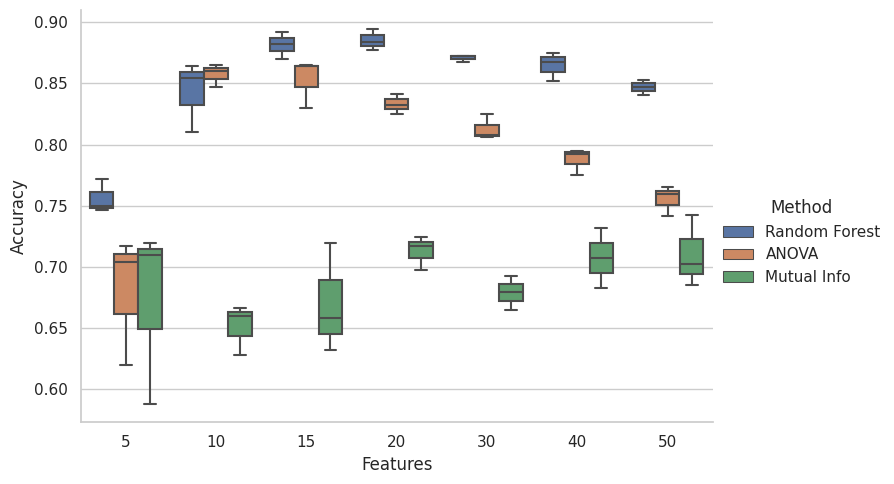

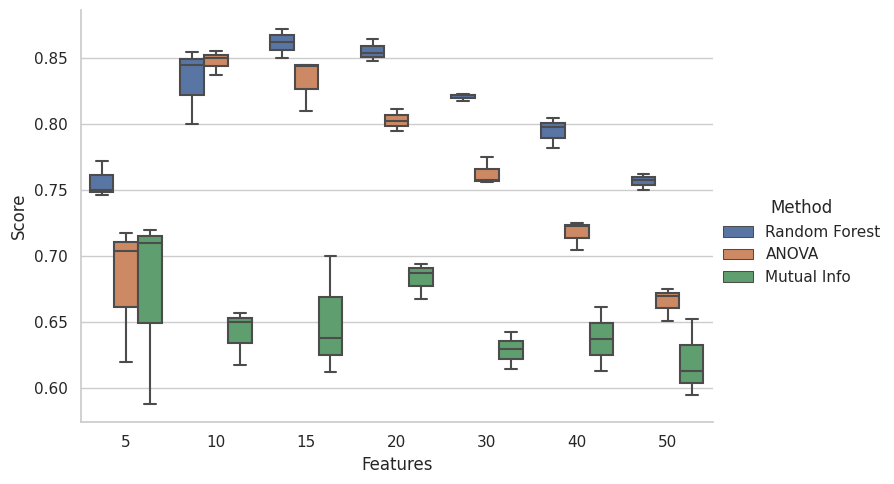

In [3]:
plot(results)

## Spam dataset

In [4]:
grid = [
    Params(method=method, dataset="spam", max_features=max_features, seed=seed)
    for method in FEATURE_SELECTION_METHODS
    for max_features in [100, 150, 200, 250, 300]
    for seed in range(3)
]
results = Experiment().run(E.AsExperiment(grid, with_cache="cache/benchmark_spam.pickle"))()
results

[WARNING] [2023-05-27 21:24:30,270:Client-AutoMLSMBO(0)::1a0b1576-fcc4-11ed-90e3-31eccd1f4552] Configuration 28 not found
[WARNING] [2023-05-27 21:24:30,270:Client-AutoMLSMBO(0)::1a0b1576-fcc4-11ed-90e3-31eccd1f4552] Configuration 430 not found
[WARNING] [2023-05-27 21:24:30,270:Client-AutoMLSMBO(0)::1a0b1576-fcc4-11ed-90e3-31eccd1f4552] Configuration 369 not found
[WARNING] [2023-05-27 21:24:30,270:Client-AutoMLSMBO(0)::1a0b1576-fcc4-11ed-90e3-31eccd1f4552] Configuration 357 not found
[WARNING] [2023-05-27 21:24:30,270:Client-AutoMLSMBO(0)::1a0b1576-fcc4-11ed-90e3-31eccd1f4552] Configuration 264 not found
[WARNING] [2023-05-27 21:24:30,270:Client-AutoMLSMBO(0)::1a0b1576-fcc4-11ed-90e3-31eccd1f4552] Configuration 254 not found
[WARNING] [2023-05-27 21:24:30,271:Client-AutoMLSMBO(0)::1a0b1576-fcc4-11ed-90e3-31eccd1f4552] Configuration 676 not found
[WARNING] [2023-05-27 21:24:30,271:Client-AutoMLSMBO(0)::1a0b1576-fcc4-11ed-90e3-31eccd1f4552] Configuration 648 not found
[WARNING] [2023-0

/home/aurif/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 229  492  585 1126 1179 1782 1963 2094 2297] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/home/aurif/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[WARNING] [2023-05-27 21:38:40,145:Client-AutoMLSMBO(0)::1452f14f-fcc6-11ed-90e3-31eccd1f4552] Configuration 28 not found
[WARNING] [2023-05-27 21:38:40,145:Client-AutoMLSMBO(0)::1452f14f-fcc6-11ed-90e3-31eccd1f4552] Configuration 430 not found
[WARNING] [2023-05-27 21:38:40,145:Client-AutoMLSMBO(0)::1452f14f-fcc6-11ed-90e3-31eccd1f4552] Configuration 369 not found
[WARNING] [2023-05-27 21:38:40,145:Client-AutoMLSMBO(0)::1452f14f-fcc6-11ed-90e3-31eccd1f4552] Configuration 357 not found
[WARNING] [2023-05-27 21:38:40,145:Client-AutoMLSMBO(0)::1452f14f-fcc6-11ed-90e3-31eccd1f4552] Configuration 264 not found
[WARNING] [2023-05-27 21:38:40,145:Client-AutoMLSMBO(0)::1452f14f-fcc6-11ed-90e3-31eccd1f4552] Configuration 254 not found
[WARNING] [2023-05-27 21:38:40,145:Client-AutoMLSMBO(0)::1452f14f-fcc6-11ed-90e3-31eccd1f4552] Configuration 648 not found
[WARNING] [2023-05-27 21:38:40,145:Client-AutoMLSMBO(0)::1452f14f-fcc6-11ed-90e3-31eccd1f4552] Configuration 40 not found
[WARNING] [2023-05

/home/aurif/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 135  709 1077 1219] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/home/aurif/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[WARNING] [2023-05-27 21:39:34,321:Client-AutoMLSMBO(1)::34e43500-fcc6-11ed-90e3-31eccd1f4552] Configuration 28 not found
[WARNING] [2023-05-27 21:39:34,321:Client-AutoMLSMBO(1)::34e43500-fcc6-11ed-90e3-31eccd1f4552] Configuration 430 not found
[WARNING] [2023-05-27 21:39:34,321:Client-AutoMLSMBO(1)::34e43500-fcc6-11ed-90e3-31eccd1f4552] Configuration 369 not found
[WARNING] [2023-05-27 21:39:34,321:Client-AutoMLSMBO(1)::34e43500-fcc6-11ed-90e3-31eccd1f4552] Configuration 357 not found
[WARNING] [2023-05-27 21:39:34,321:Client-AutoMLSMBO(1)::34e43500-fcc6-11ed-90e3-31eccd1f4552] Configuration 264 not found
[WARNING] [2023-05-27 21:39:34,321:Client-AutoMLSMBO(1)::34e43500-fcc6-11ed-90e3-31eccd1f4552] Configuration 254 not found
[WARNING] [2023-05-27 21:39:34,321:Client-AutoMLSMBO(1)::34e43500-fcc6-11ed-90e3-31eccd1f4552] Configuration 648 not found
[WARNING] [2023-05-27 21:39:34,321:Client-AutoMLSMBO(1)::34e43500-fcc6-11ed-90e3-31eccd1f4552] Configuration 40 not found
[WARNING] [2023-05

/home/aurif/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [441] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/home/aurif/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[WARNING] [2023-05-27 21:40:30,578:Client-AutoMLSMBO(2)::561f828d-fcc6-11ed-90e3-31eccd1f4552] Configuration 28 not found
[WARNING] [2023-05-27 21:40:30,578:Client-AutoMLSMBO(2)::561f828d-fcc6-11ed-90e3-31eccd1f4552] Configuration 369 not found
[WARNING] [2023-05-27 21:40:30,578:Client-AutoMLSMBO(2)::561f828d-fcc6-11ed-90e3-31eccd1f4552] Configuration 430 not found
[WARNING] [2023-05-27 21:40:30,578:Client-AutoMLSMBO(2)::561f828d-fcc6-11ed-90e3-31eccd1f4552] Configuration 357 not found
[WARNING] [2023-05-27 21:40:30,578:Client-AutoMLSMBO(2)::561f828d-fcc6-11ed-90e3-31eccd1f4552] Configuration 264 not found
[WARNING] [2023-05-27 21:40:30,578:Client-AutoMLSMBO(2)::561f828d-fcc6-11ed-90e3-31eccd1f4552] Configuration 254 not found
[WARNING] [2023-05-27 21:40:30,578:Client-AutoMLSMBO(2)::561f828d-fcc6-11ed-90e3-31eccd1f4552] Configuration 648 not found
[WARNING] [2023-05-27 21:40:30,578:Client-AutoMLSMBO(2)::561f828d-fcc6-11ed-90e3-31eccd1f4552] Configuration 40 not found
[WARNING] [2023-05

/home/aurif/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 229  492  585 1126 1179 1782 1963 2094 2297] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/home/aurif/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[WARNING] [2023-05-27 21:41:24,653:Client-AutoMLSMBO(0)::769026da-fcc6-11ed-90e3-31eccd1f4552] Configuration 28 not found
[WARNING] [2023-05-27 21:41:24,653:Client-AutoMLSMBO(0)::769026da-fcc6-11ed-90e3-31eccd1f4552] Configuration 430 not found
[WARNING] [2023-05-27 21:41:24,653:Client-AutoMLSMBO(0)::769026da-fcc6-11ed-90e3-31eccd1f4552] Configuration 369 not found
[WARNING] [2023-05-27 21:41:24,653:Client-AutoMLSMBO(0)::769026da-fcc6-11ed-90e3-31eccd1f4552] Configuration 264 not found
[WARNING] [2023-05-27 21:41:24,653:Client-AutoMLSMBO(0)::769026da-fcc6-11ed-90e3-31eccd1f4552] Configuration 357 not found
[WARNING] [2023-05-27 21:41:24,653:Client-AutoMLSMBO(0)::769026da-fcc6-11ed-90e3-31eccd1f4552] Configuration 254 not found
[WARNING] [2023-05-27 21:41:24,653:Client-AutoMLSMBO(0)::769026da-fcc6-11ed-90e3-31eccd1f4552] Configuration 648 not found
[WARNING] [2023-05-27 21:41:24,653:Client-AutoMLSMBO(0)::769026da-fcc6-11ed-90e3-31eccd1f4552] Configuration 676 not found
[WARNING] [2023-0

/home/aurif/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 135  709 1077 1219] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/home/aurif/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[WARNING] [2023-05-27 21:42:19,037:Client-AutoMLSMBO(1)::97084ae5-fcc6-11ed-90e3-31eccd1f4552] Configuration 28 not found
[WARNING] [2023-05-27 21:42:19,037:Client-AutoMLSMBO(1)::97084ae5-fcc6-11ed-90e3-31eccd1f4552] Configuration 357 not found
[WARNING] [2023-05-27 21:42:19,037:Client-AutoMLSMBO(1)::97084ae5-fcc6-11ed-90e3-31eccd1f4552] Configuration 430 not found
[WARNING] [2023-05-27 21:42:19,037:Client-AutoMLSMBO(1)::97084ae5-fcc6-11ed-90e3-31eccd1f4552] Configuration 264 not found
[WARNING] [2023-05-27 21:42:19,037:Client-AutoMLSMBO(1)::97084ae5-fcc6-11ed-90e3-31eccd1f4552] Configuration 369 not found
[WARNING] [2023-05-27 21:42:19,037:Client-AutoMLSMBO(1)::97084ae5-fcc6-11ed-90e3-31eccd1f4552] Configuration 254 not found
[WARNING] [2023-05-27 21:42:19,037:Client-AutoMLSMBO(1)::97084ae5-fcc6-11ed-90e3-31eccd1f4552] Configuration 648 not found
[WARNING] [2023-05-27 21:42:19,037:Client-AutoMLSMBO(1)::97084ae5-fcc6-11ed-90e3-31eccd1f4552] Configuration 676 not found
[WARNING] [2023-0

/home/aurif/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [441] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/home/aurif/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[WARNING] [2023-05-27 21:43:13,696:Client-AutoMLSMBO(2)::b7a02149-fcc6-11ed-90e3-31eccd1f4552] Configuration 28 not found
[WARNING] [2023-05-27 21:43:13,696:Client-AutoMLSMBO(2)::b7a02149-fcc6-11ed-90e3-31eccd1f4552] Configuration 430 not found
[WARNING] [2023-05-27 21:43:13,696:Client-AutoMLSMBO(2)::b7a02149-fcc6-11ed-90e3-31eccd1f4552] Configuration 369 not found
[WARNING] [2023-05-27 21:43:13,696:Client-AutoMLSMBO(2)::b7a02149-fcc6-11ed-90e3-31eccd1f4552] Configuration 264 not found
[WARNING] [2023-05-27 21:43:13,696:Client-AutoMLSMBO(2)::b7a02149-fcc6-11ed-90e3-31eccd1f4552] Configuration 357 not found
[WARNING] [2023-05-27 21:43:13,696:Client-AutoMLSMBO(2)::b7a02149-fcc6-11ed-90e3-31eccd1f4552] Configuration 254 not found
[WARNING] [2023-05-27 21:43:13,696:Client-AutoMLSMBO(2)::b7a02149-fcc6-11ed-90e3-31eccd1f4552] Configuration 648 not found
[WARNING] [2023-05-27 21:43:13,696:Client-AutoMLSMBO(2)::b7a02149-fcc6-11ed-90e3-31eccd1f4552] Configuration 676 not found
[WARNING] [2023-0

/home/aurif/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 229  492  585 1126 1179 1782 1963 2094 2297] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/home/aurif/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[WARNING] [2023-05-27 21:44:07,690:Client-AutoMLSMBO(0)::d7c1bdfe-fcc6-11ed-90e3-31eccd1f4552] Configuration 28 not found
[WARNING] [2023-05-27 21:44:07,690:Client-AutoMLSMBO(0)::d7c1bdfe-fcc6-11ed-90e3-31eccd1f4552] Configuration 357 not found
[WARNING] [2023-05-27 21:44:07,690:Client-AutoMLSMBO(0)::d7c1bdfe-fcc6-11ed-90e3-31eccd1f4552] Configuration 430 not found
[WARNING] [2023-05-27 21:44:07,690:Client-AutoMLSMBO(0)::d7c1bdfe-fcc6-11ed-90e3-31eccd1f4552] Configuration 369 not found
[WARNING] [2023-05-27 21:44:07,690:Client-AutoMLSMBO(0)::d7c1bdfe-fcc6-11ed-90e3-31eccd1f4552] Configuration 264 not found
[WARNING] [2023-05-27 21:44:07,690:Client-AutoMLSMBO(0)::d7c1bdfe-fcc6-11ed-90e3-31eccd1f4552] Configuration 254 not found
[WARNING] [2023-05-27 21:44:07,690:Client-AutoMLSMBO(0)::d7c1bdfe-fcc6-11ed-90e3-31eccd1f4552] Configuration 648 not found
[WARNING] [2023-05-27 21:44:07,690:Client-AutoMLSMBO(0)::d7c1bdfe-fcc6-11ed-90e3-31eccd1f4552] Configuration 635 not found
[WARNING] [2023-0

/home/aurif/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 135  709 1077 1219] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/home/aurif/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[WARNING] [2023-05-27 21:45:03,001:Client-AutoMLSMBO(1)::f89f39ea-fcc6-11ed-90e3-31eccd1f4552] Configuration 28 not found
[WARNING] [2023-05-27 21:45:03,001:Client-AutoMLSMBO(1)::f89f39ea-fcc6-11ed-90e3-31eccd1f4552] Configuration 430 not found
[WARNING] [2023-05-27 21:45:03,001:Client-AutoMLSMBO(1)::f89f39ea-fcc6-11ed-90e3-31eccd1f4552] Configuration 264 not found
[WARNING] [2023-05-27 21:45:03,001:Client-AutoMLSMBO(1)::f89f39ea-fcc6-11ed-90e3-31eccd1f4552] Configuration 369 not found
[WARNING] [2023-05-27 21:45:03,001:Client-AutoMLSMBO(1)::f89f39ea-fcc6-11ed-90e3-31eccd1f4552] Configuration 357 not found
[WARNING] [2023-05-27 21:45:03,001:Client-AutoMLSMBO(1)::f89f39ea-fcc6-11ed-90e3-31eccd1f4552] Configuration 254 not found
[WARNING] [2023-05-27 21:45:03,001:Client-AutoMLSMBO(1)::f89f39ea-fcc6-11ed-90e3-31eccd1f4552] Configuration 648 not found
[WARNING] [2023-05-27 21:45:03,001:Client-AutoMLSMBO(1)::f89f39ea-fcc6-11ed-90e3-31eccd1f4552] Configuration 635 not found
[WARNING] [2023-0

/home/aurif/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [441] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/home/aurif/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[WARNING] [2023-05-27 21:45:58,906:Client-AutoMLSMBO(2)::1a0f8a8c-fcc7-11ed-90e3-31eccd1f4552] Configuration 28 not found
[WARNING] [2023-05-27 21:45:58,906:Client-AutoMLSMBO(2)::1a0f8a8c-fcc7-11ed-90e3-31eccd1f4552] Configuration 430 not found
[WARNING] [2023-05-27 21:45:58,906:Client-AutoMLSMBO(2)::1a0f8a8c-fcc7-11ed-90e3-31eccd1f4552] Configuration 369 not found
[WARNING] [2023-05-27 21:45:58,906:Client-AutoMLSMBO(2)::1a0f8a8c-fcc7-11ed-90e3-31eccd1f4552] Configuration 264 not found
[WARNING] [2023-05-27 21:45:58,906:Client-AutoMLSMBO(2)::1a0f8a8c-fcc7-11ed-90e3-31eccd1f4552] Configuration 254 not found
[WARNING] [2023-05-27 21:45:58,906:Client-AutoMLSMBO(2)::1a0f8a8c-fcc7-11ed-90e3-31eccd1f4552] Configuration 676 not found
[WARNING] [2023-05-27 21:45:58,906:Client-AutoMLSMBO(2)::1a0f8a8c-fcc7-11ed-90e3-31eccd1f4552] Configuration 357 not found
[WARNING] [2023-05-27 21:45:58,906:Client-AutoMLSMBO(2)::1a0f8a8c-fcc7-11ed-90e3-31eccd1f4552] Configuration 648 not found
[WARNING] [2023-0

/home/aurif/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 229  492  585 1126 1179 1782 1963 2094 2297] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/home/aurif/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[WARNING] [2023-05-27 21:46:55,834:Client-AutoMLSMBO(0)::3bbfaaa5-fcc7-11ed-90e3-31eccd1f4552] Configuration 430 not found
[WARNING] [2023-05-27 21:46:55,834:Client-AutoMLSMBO(0)::3bbfaaa5-fcc7-11ed-90e3-31eccd1f4552] Configuration 28 not found
[WARNING] [2023-05-27 21:46:55,834:Client-AutoMLSMBO(0)::3bbfaaa5-fcc7-11ed-90e3-31eccd1f4552] Configuration 369 not found
[WARNING] [2023-05-27 21:46:55,834:Client-AutoMLSMBO(0)::3bbfaaa5-fcc7-11ed-90e3-31eccd1f4552] Configuration 254 not found
[WARNING] [2023-05-27 21:46:55,834:Client-AutoMLSMBO(0)::3bbfaaa5-fcc7-11ed-90e3-31eccd1f4552] Configuration 264 not found
[WARNING] [2023-05-27 21:46:55,834:Client-AutoMLSMBO(0)::3bbfaaa5-fcc7-11ed-90e3-31eccd1f4552] Configuration 357 not found
[WARNING] [2023-05-27 21:46:55,834:Client-AutoMLSMBO(0)::3bbfaaa5-fcc7-11ed-90e3-31eccd1f4552] Configuration 635 not found
[WARNING] [2023-05-27 21:46:55,834:Client-AutoMLSMBO(0)::3bbfaaa5-fcc7-11ed-90e3-31eccd1f4552] Configuration 648 not found
[WARNING] [2023-0

/home/aurif/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 135  709 1077 1219] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/home/aurif/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[WARNING] [2023-05-27 21:47:50,652:Client-AutoMLSMBO(1)::5c9fa7a7-fcc7-11ed-90e3-31eccd1f4552] Configuration 430 not found
[WARNING] [2023-05-27 21:47:50,652:Client-AutoMLSMBO(1)::5c9fa7a7-fcc7-11ed-90e3-31eccd1f4552] Configuration 28 not found
[WARNING] [2023-05-27 21:47:50,652:Client-AutoMLSMBO(1)::5c9fa7a7-fcc7-11ed-90e3-31eccd1f4552] Configuration 676 not found
[WARNING] [2023-05-27 21:47:50,652:Client-AutoMLSMBO(1)::5c9fa7a7-fcc7-11ed-90e3-31eccd1f4552] Configuration 264 not found
[WARNING] [2023-05-27 21:47:50,652:Client-AutoMLSMBO(1)::5c9fa7a7-fcc7-11ed-90e3-31eccd1f4552] Configuration 369 not found
[WARNING] [2023-05-27 21:47:50,652:Client-AutoMLSMBO(1)::5c9fa7a7-fcc7-11ed-90e3-31eccd1f4552] Configuration 357 not found
[WARNING] [2023-05-27 21:47:50,652:Client-AutoMLSMBO(1)::5c9fa7a7-fcc7-11ed-90e3-31eccd1f4552] Configuration 254 not found
[WARNING] [2023-05-27 21:47:50,652:Client-AutoMLSMBO(1)::5c9fa7a7-fcc7-11ed-90e3-31eccd1f4552] Configuration 635 not found
[WARNING] [2023-0

/home/aurif/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [441] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/home/aurif/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[WARNING] [2023-05-27 21:48:44,766:Client-AutoMLSMBO(2)::7cebd657-fcc7-11ed-90e3-31eccd1f4552] Configuration 430 not found
[WARNING] [2023-05-27 21:48:44,766:Client-AutoMLSMBO(2)::7cebd657-fcc7-11ed-90e3-31eccd1f4552] Configuration 254 not found
[WARNING] [2023-05-27 21:48:44,766:Client-AutoMLSMBO(2)::7cebd657-fcc7-11ed-90e3-31eccd1f4552] Configuration 28 not found
[WARNING] [2023-05-27 21:48:44,766:Client-AutoMLSMBO(2)::7cebd657-fcc7-11ed-90e3-31eccd1f4552] Configuration 369 not found
[WARNING] [2023-05-27 21:48:44,766:Client-AutoMLSMBO(2)::7cebd657-fcc7-11ed-90e3-31eccd1f4552] Configuration 264 not found
[WARNING] [2023-05-27 21:48:44,766:Client-AutoMLSMBO(2)::7cebd657-fcc7-11ed-90e3-31eccd1f4552] Configuration 357 not found
[WARNING] [2023-05-27 21:48:44,766:Client-AutoMLSMBO(2)::7cebd657-fcc7-11ed-90e3-31eccd1f4552] Configuration 635 not found
[WARNING] [2023-05-27 21:48:44,766:Client-AutoMLSMBO(2)::7cebd657-fcc7-11ed-90e3-31eccd1f4552] Configuration 648 not found
[WARNING] [2023-0

/home/aurif/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 229  492  585 1126 1179 1782 1963 2094 2297] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/home/aurif/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[WARNING] [2023-05-27 21:49:41,067:Client-AutoMLSMBO(0)::9e6b9744-fcc7-11ed-90e3-31eccd1f4552] Configuration 430 not found
[WARNING] [2023-05-27 21:49:41,067:Client-AutoMLSMBO(0)::9e6b9744-fcc7-11ed-90e3-31eccd1f4552] Configuration 28 not found
[WARNING] [2023-05-27 21:49:41,067:Client-AutoMLSMBO(0)::9e6b9744-fcc7-11ed-90e3-31eccd1f4552] Configuration 369 not found
[WARNING] [2023-05-27 21:49:41,067:Client-AutoMLSMBO(0)::9e6b9744-fcc7-11ed-90e3-31eccd1f4552] Configuration 648 not found
[WARNING] [2023-05-27 21:49:41,067:Client-AutoMLSMBO(0)::9e6b9744-fcc7-11ed-90e3-31eccd1f4552] Configuration 254 not found
[WARNING] [2023-05-27 21:49:41,067:Client-AutoMLSMBO(0)::9e6b9744-fcc7-11ed-90e3-31eccd1f4552] Configuration 264 not found
[WARNING] [2023-05-27 21:49:41,067:Client-AutoMLSMBO(0)::9e6b9744-fcc7-11ed-90e3-31eccd1f4552] Configuration 357 not found
[WARNING] [2023-05-27 21:49:41,067:Client-AutoMLSMBO(0)::9e6b9744-fcc7-11ed-90e3-31eccd1f4552] Configuration 635 not found
[WARNING] [2023-0

/home/aurif/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 135  709 1077 1219] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/home/aurif/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[WARNING] [2023-05-27 21:50:35,293:Client-AutoMLSMBO(1)::bec17835-fcc7-11ed-90e3-31eccd1f4552] Configuration 430 not found
[WARNING] [2023-05-27 21:50:35,293:Client-AutoMLSMBO(1)::bec17835-fcc7-11ed-90e3-31eccd1f4552] Configuration 28 not found
[WARNING] [2023-05-27 21:50:35,293:Client-AutoMLSMBO(1)::bec17835-fcc7-11ed-90e3-31eccd1f4552] Configuration 264 not found
[WARNING] [2023-05-27 21:50:35,293:Client-AutoMLSMBO(1)::bec17835-fcc7-11ed-90e3-31eccd1f4552] Configuration 369 not found
[WARNING] [2023-05-27 21:50:35,293:Client-AutoMLSMBO(1)::bec17835-fcc7-11ed-90e3-31eccd1f4552] Configuration 357 not found
[WARNING] [2023-05-27 21:50:35,293:Client-AutoMLSMBO(1)::bec17835-fcc7-11ed-90e3-31eccd1f4552] Configuration 254 not found
[WARNING] [2023-05-27 21:50:35,293:Client-AutoMLSMBO(1)::bec17835-fcc7-11ed-90e3-31eccd1f4552] Configuration 635 not found
[WARNING] [2023-05-27 21:50:35,293:Client-AutoMLSMBO(1)::bec17835-fcc7-11ed-90e3-31eccd1f4552] Configuration 648 not found
[WARNING] [2023-0

/home/aurif/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [441] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/home/aurif/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[WARNING] [2023-05-27 21:51:31,090:Client-AutoMLSMBO(2)::e005636b-fcc7-11ed-90e3-31eccd1f4552] Configuration 430 not found
[WARNING] [2023-05-27 21:51:31,090:Client-AutoMLSMBO(2)::e005636b-fcc7-11ed-90e3-31eccd1f4552] Configuration 369 not found
[WARNING] [2023-05-27 21:51:31,090:Client-AutoMLSMBO(2)::e005636b-fcc7-11ed-90e3-31eccd1f4552] Configuration 28 not found
[WARNING] [2023-05-27 21:51:31,090:Client-AutoMLSMBO(2)::e005636b-fcc7-11ed-90e3-31eccd1f4552] Configuration 254 not found
[WARNING] [2023-05-27 21:51:31,090:Client-AutoMLSMBO(2)::e005636b-fcc7-11ed-90e3-31eccd1f4552] Configuration 264 not found
[WARNING] [2023-05-27 21:51:31,090:Client-AutoMLSMBO(2)::e005636b-fcc7-11ed-90e3-31eccd1f4552] Configuration 357 not found
[WARNING] [2023-05-27 21:51:31,090:Client-AutoMLSMBO(2)::e005636b-fcc7-11ed-90e3-31eccd1f4552] Configuration 635 not found
[WARNING] [2023-05-27 21:51:31,090:Client-AutoMLSMBO(2)::e005636b-fcc7-11ed-90e3-31eccd1f4552] Configuration 648 not found
[WARNING] [2023-0

,iteration,method,dataset,max_features,seed,Accuracy,Score,Features
0,0,Random Forest,spam,100,0,0.872106,0.872106,100
1,0,Random Forest,spam,100,1,0.951497,0.951497,100
2,0,Random Forest,spam,100,2,0.928711,0.928711,100
3,0,Random Forest,spam,150,0,0.900000,0.895000,150
4,0,Random Forest,spam,150,1,0.966217,0.961217,150
5,0,Random Forest,spam,150,2,0.929952,0.924952,150
6,0,Random Forest,spam,200,0,0.879955,0.869955,200
7,0,Random Forest,spam,200,1,0.956193,0.946193,200
8,0,Random Forest,spam,200,2,0.935780,0.925780,200
9,0,Random Forest,spam,250,0,0.889667,0.874667,250


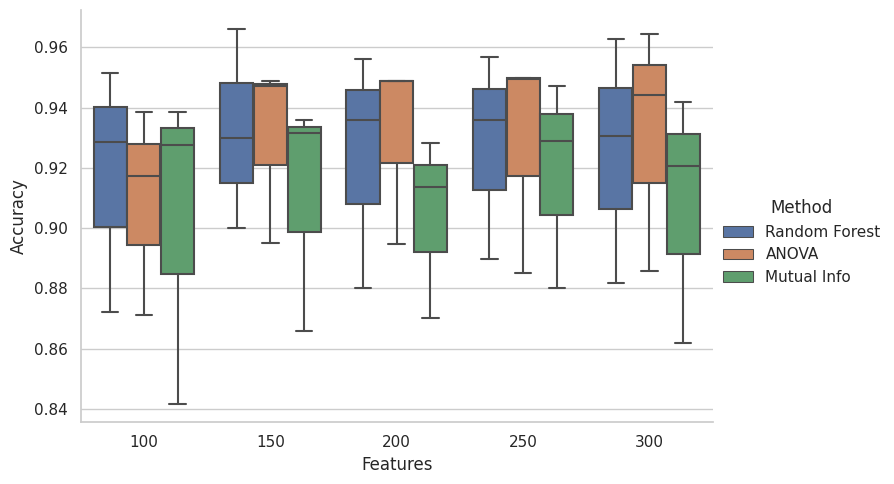

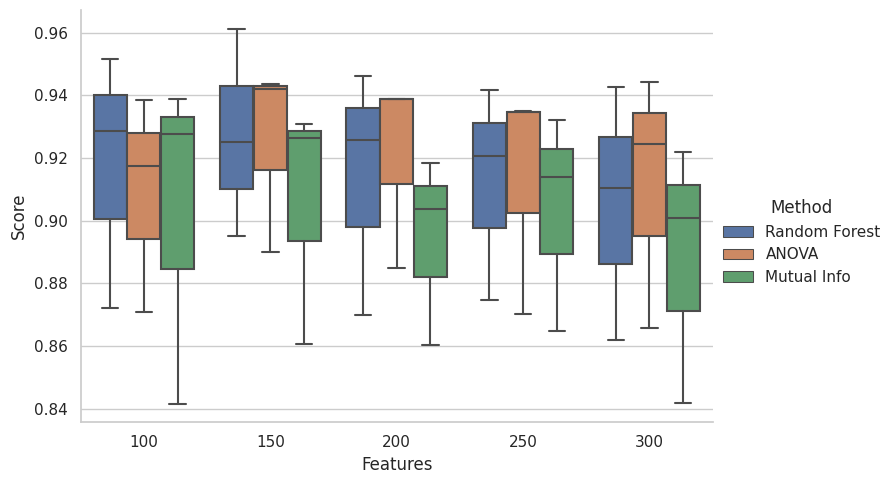

In [5]:
plot(results)